In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
class style:    
    BOLD = '\033[1m'
    END = '\033[0m'

%matplotlib inline

In [3]:
print (style.BOLD + 'This is my text string.' + style.END)

This is my text string.


In [4]:
Customer_Data = pd.read_excel(r'../Capstone/Input Files/Customer_Data.xlsx')
Final_invoice = pd.read_csv(r'../Capstone/Input Files/Final_invoice.csv')
JTD = pd.read_csv(r'../Capstone/Input Files/JTD.csv')
Plant = pd.read_excel(r'../Capstone/Input Files/Plant Master.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9,10,14,15,21,41,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print('Customer Data Shape',Customer_Data.shape)
print('Final Invoice Shape',Final_invoice.shape)
print('JTD           Shape',JTD.shape)
print('Plant         Shape',Plant.shape)

Customer Data Shape (555338, 9)
Final Invoice Shape (492314, 59)
JTD           Shape (5619484, 10)
Plant         Shape (438, 13)


In [5]:
Customer_No_Cus = list(Customer_Data['Customer No.'].unique())
Customer_No_Invoice = list(Final_invoice['Customer No.'].unique())

In [6]:
len(Customer_Data)
len(Customer_No_Invoice)

253484

In [7]:
# common = []
# for i in Customer_No_Invoice:
#     if i in Customer_No_Cus:
#         common.append(i)

In [7]:
Customer_Invoice_data = pd.merge(Final_invoice,Customer_Data,left_on='Customer No.',right_on='Customer No.',how='left')

In [8]:
Customer_Invoice_data = Customer_Invoice_data.merge(Plant,left_on='Plant',right_on='Plant',how='left')

In [9]:
Customer_Invoice_data.describe().to_excel(r'../Capstone/Input Files/Numeirc_Col_Summary.xlsx')

In [10]:
drop_cols = ['Amt Rcvd From Custom','Amt Rcvd From Ins Co','CGST(14%)','CGST(2.5%)','CGST(6%)','CGST(9%)','IGST(12%)','IGST(18%)','IGST(28%)','IGST(5%)','Outstanding Amt','SGST/UGST(14%)','SGST/UGST(2.5%)','SGST/UGST(6%)','SGST/UGST(9%)','Service Advisor Name','TDS amount','Total CGST','Total GST','Total IGST','Total SGST/UGST','Marital Status','Occupation','Date of Birth','Death date']

In [11]:
Customer_Invoice_data.drop(columns=drop_cols,inplace=True)

In [12]:
Customer_Invoice_data.describe(include='object').to_excel(r'../Capstone/Input Files/Object_Col_Summary.xlsx')

In [13]:
Pincode = pd.read_csv(r'../Capstone/Input Files/pin code.csv')

In [14]:
Pincode_subset = Pincode[['pincode','regionname','circlename','statename']]

In [15]:
# Customer_Invoice_data = pd.merge(Customer_Invoice_data,Pincode_subset,left_on='Pin code',right_on='pincode',how='left')

In [16]:
Pincode_subset.drop_duplicates(subset='pincode',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
Pincode_subset.shape

(19100, 4)

In [18]:
Customer_Invoice_data = Customer_Invoice_data.merge(Pincode_subset,left_on='Pin code',right_on='pincode',how='left')

In [19]:
Customer_Invoice_data.shape

(492314, 58)

In [20]:
print('Missing City Count - ',len(Customer_Invoice_data[Customer_Invoice_data['pincode'].isnull()]))

Missing City Count -  47272


In [21]:
Missing_City = Customer_Invoice_data[Customer_Invoice_data['pincode'].isnull()]
# Missing_City.to_excel(r'../Capstone/Input Files/Missing_City_Data.xlsx')

In [161]:
# Customer_Invoice_data['regionname'].fillna(Customer_Invoice_data['CITY'],inplace=True)
Complete_City = Customer_Invoice_data[Customer_Invoice_data['pincode'].isnull()==False]

In [165]:
Mapped_City = pd.read_excel(r'../Capstone/Input Files/Missing_City_Data.xlsx')

In [167]:
Mapped_City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47272 entries, 0 to 47271
Data columns (total 58 columns):
Unnamed: 0                 47272 non-null int64
Area / Locality            41361 non-null object
CITY                       47272 non-null object
Cash /Cashless Type        2545 non-null object
Claim No.                  456 non-null object
Cust Type                  47272 non-null object
Customer No.               47272 non-null object
District                   47272 non-null object
Expiry Date                2437 non-null object
Gate Pass Date             5141 non-null object
Gate Pass Time             47272 non-null object
Insurance Company          2309 non-null object
Invoice Date               47272 non-null object
Invoice No                 47272 non-null int64
Invoice Time               47272 non-null object
Job Card No                47272 non-null int64
JobCard Date               47272 non-null object
JobCard Time               47272 non-null object
KMs Reading       

In [169]:
Final_Invoice_data = pd.concat([Complete_City,Mapped_City])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [160]:
Pincode[Pincode['Districtname'].str.lower().str.contains('thane')==True]['regionname'].value_counts().index[0]

'Mumbai'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492314 entries, 0 to 492313
Data columns (total 59 columns):
Unnamed: 0                 492314 non-null int64
Area / Locality            468424 non-null object
CITY                       492313 non-null object
Cash /Cashless Type        27420 non-null object
Claim No.                  4804 non-null object
Cust Type                  492314 non-null object
Customer No.               492314 non-null object
District                   492314 non-null object
Expiry Date                22231 non-null object
Gate Pass Date             40915 non-null object
Gate Pass Time             492314 non-null object
Insurance Company          23591 non-null object
Invoice Date               492314 non-null object
Invoice No                 492314 non-null int64
Invoice Time               492314 non-null object
Job Card No                492314 non-null int64
JobCard Date               492314 non-null object
JobCard Time               492314 non-null objec

In [172]:
State_subset = Pincode[['regionname','statename']]

In [174]:
State_subset.drop_duplicates(subset='regionname',inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [177]:
State_subset.columns=['regionname','State_Final']

,regionname,State_Final
0,Hyderabad,TELANGANA
4674,Hyderabad City,TELANGANA
5231,Kurnool,ANDHRA PRADESH
8911,Vijayawada,ANDHRA PRADESH
13388,Visakhapatnam,ANDHRA PRADESH
16169,Dibrugarh,ASSAM
17935,Guwahati HQ,ASSAM
20170,Muzaffarpur,BIHAR
25320,Patna HQ,BIHAR
29233,Raipur,CHATTISGARH


In [179]:
Final_Invoice_data = pd.merge(Final_Invoice_data,State_subset,left_on='regionname',right_on='regionname',how='left')

In [183]:
Final_Invoice_data.to_excel(r'../Capstone/Input Files/Final_Invoice_data.xlsx')

In [185]:
Final_Invoice_data['All']=1

In [190]:
Final_Invoice_data.pivot_table(index='Make',columns='State_Final',values='All',aggfunc=len,margins=True).sort_values(by='All',ascending=False)

State_Final,ANDHRA PRADESH,ASSAM,BIHAR,CHANDIGARH,CHATTISGARH,DELHI,GOA,GUJARAT,HARYANA,HIMACHAL PRADESH,...,ODISHA,PUNJAB,RAJASTHAN,TAMIL NADU,TELANGANA,TRIPURA,UTTAR PRADESH,UTTARAKHAND,WEST BENGAL,All
Make,,,,,,,,,,,,,,,,,,,,,
All,19222.0,107.0,3441.0,19169.0,648.0,5445.0,3507.0,26226.0,17812.0,3175.0,...,2318.0,6042.0,13416.0,118028.0,29261.0,2.0,31434.0,2507.0,2069.0,492314
MARUTI SUZUKI,3859.0,51.0,640.0,5723.0,217.0,1855.0,832.0,9655.0,7269.0,1225.0,...,654.0,2168.0,5302.0,26233.0,9348.0,NaN,12050.0,1009.0,541.0,147102
MAHINDRA & MAHINDRA,3063.0,8.0,1600.0,2324.0,102.0,764.0,240.0,2271.0,1959.0,426.0,...,517.0,572.0,3264.0,27911.0,4498.0,1.0,4977.0,353.0,679.0,87356
HYUNDAI,1953.0,24.0,171.0,3812.0,107.0,1473.0,461.0,6452.0,4038.0,515.0,...,323.0,1033.0,1619.0,19411.0,5236.0,1.0,6876.0,382.0,250.0,85342
TATA MOTORS,5152.0,8.0,664.0,1886.0,75.0,283.0,881.0,2033.0,1009.0,209.0,...,351.0,392.0,700.0,17474.0,3783.0,NaN,2203.0,174.0,229.0,58034
GENERAL MOTORS,1604.0,3.0,167.0,1345.0,19.0,317.0,332.0,1475.0,1118.0,285.0,...,236.0,269.0,640.0,5698.0,1371.0,NaN,1728.0,80.0,130.0,29092
FORD,906.0,5.0,37.0,817.0,23.0,109.0,126.0,721.0,420.0,124.0,...,98.0,143.0,376.0,7406.0,1425.0,NaN,686.0,122.0,71.0,21616
TOYOTA,927.0,NaN,65.0,1049.0,35.0,212.0,127.0,733.0,587.0,146.0,...,36.0,483.0,518.0,4455.0,1313.0,NaN,629.0,119.0,44.0,19466
HONDA,356.0,2.0,44.0,517.0,33.0,244.0,120.0,934.0,584.0,89.0,...,42.0,192.0,303.0,2940.0,641.0,NaN,1188.0,68.0,40.0,15464


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


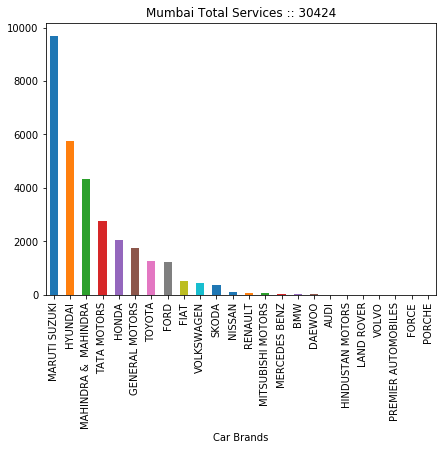

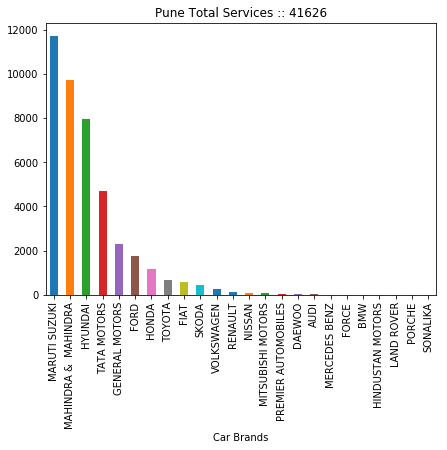

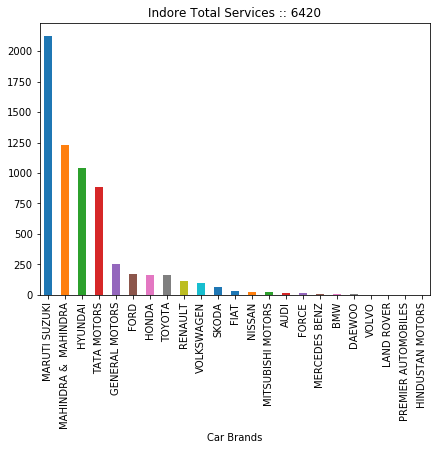

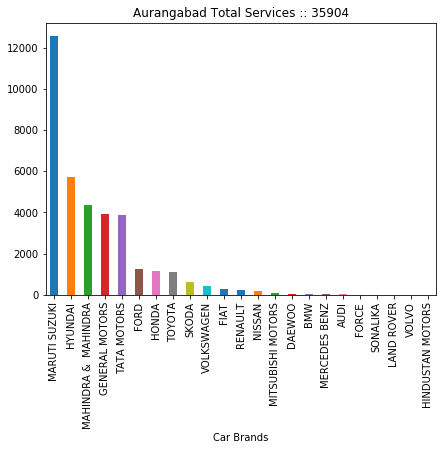

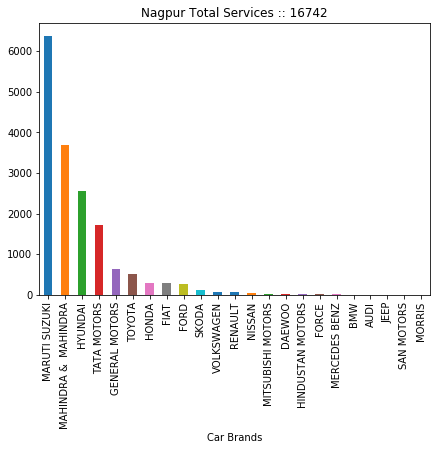

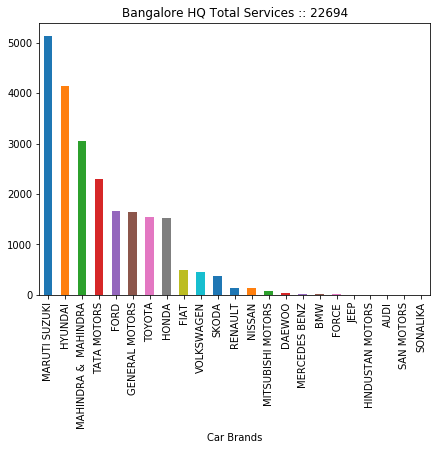

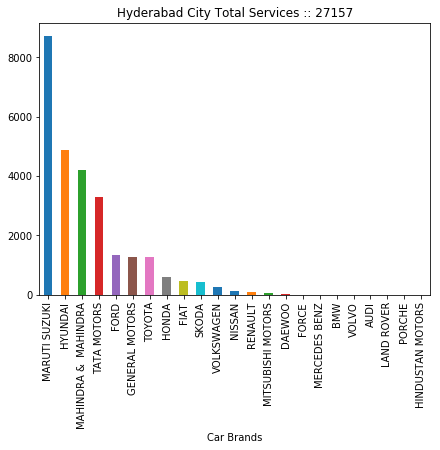

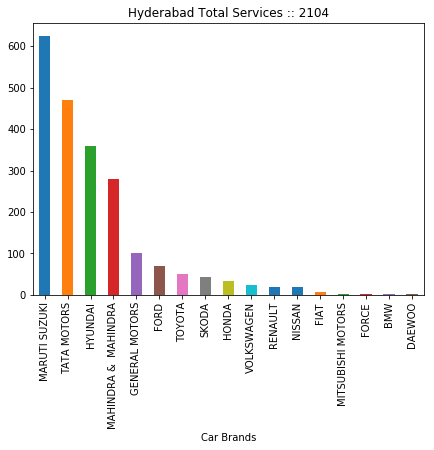

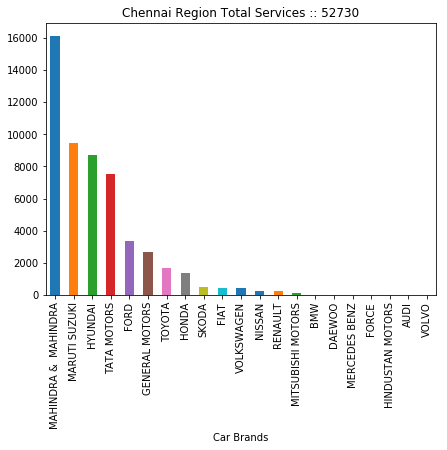

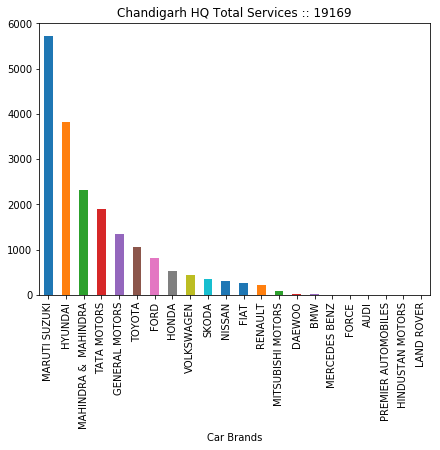

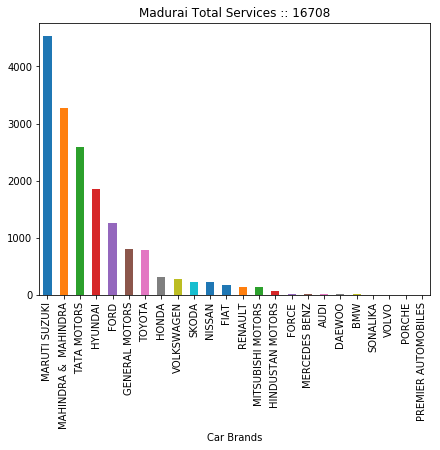

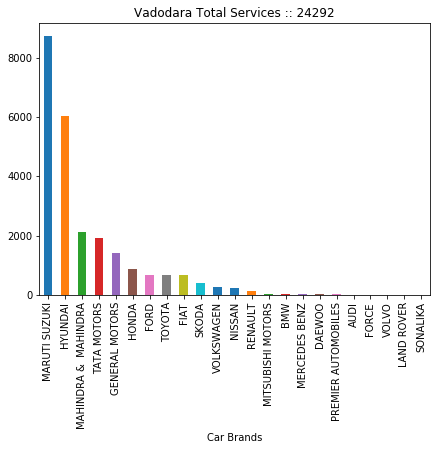

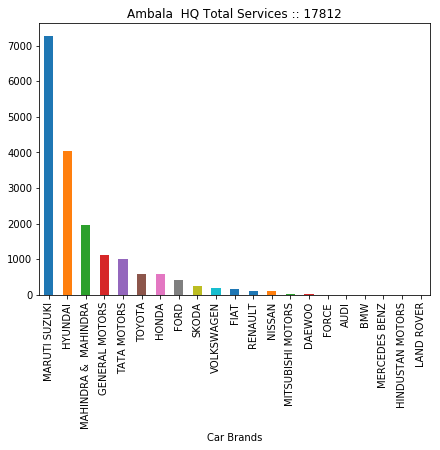

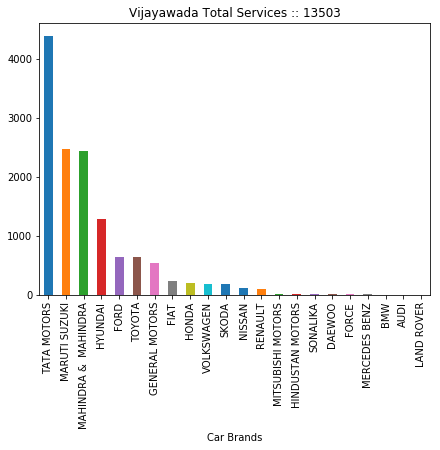

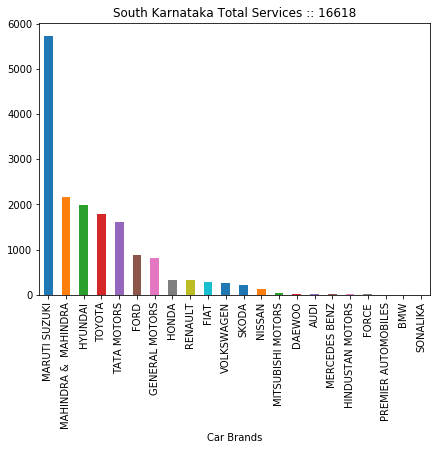

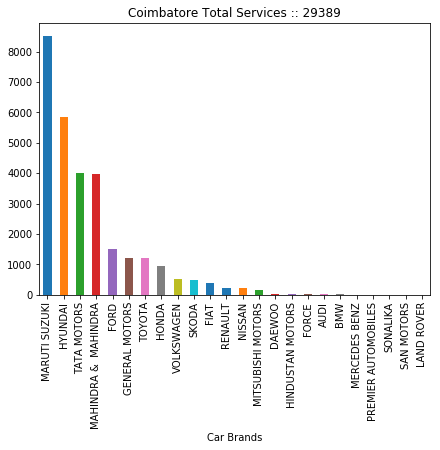

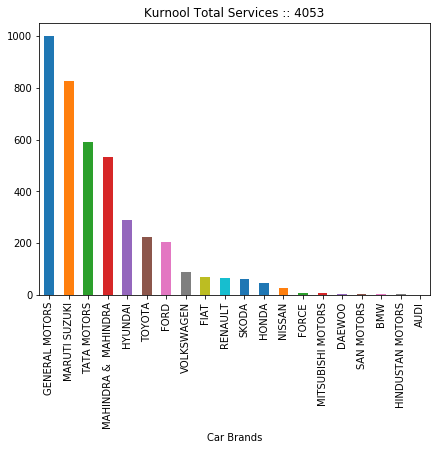

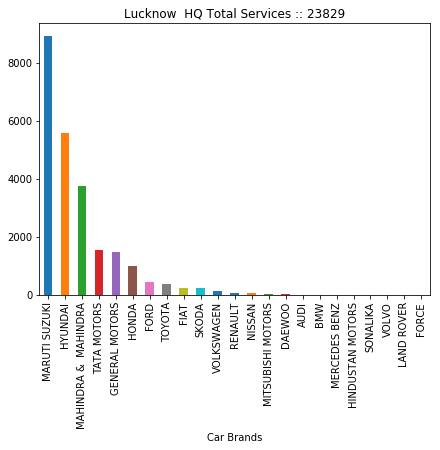

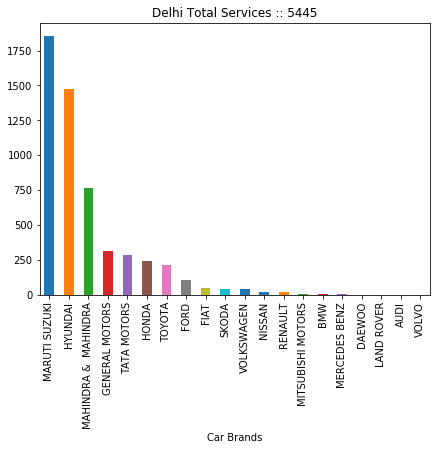

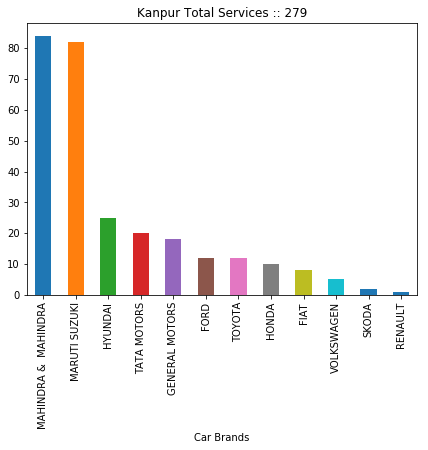

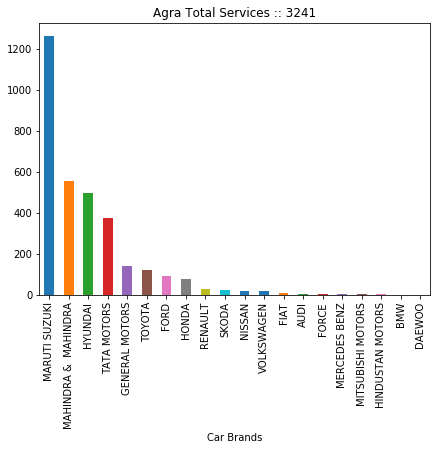

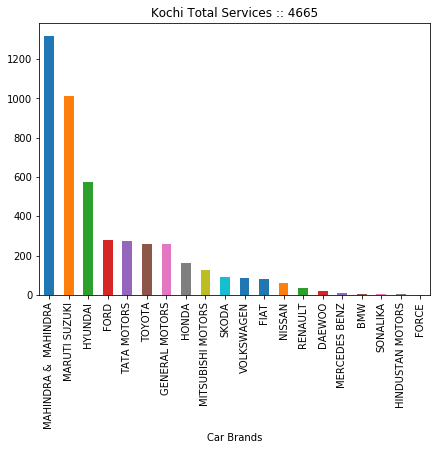

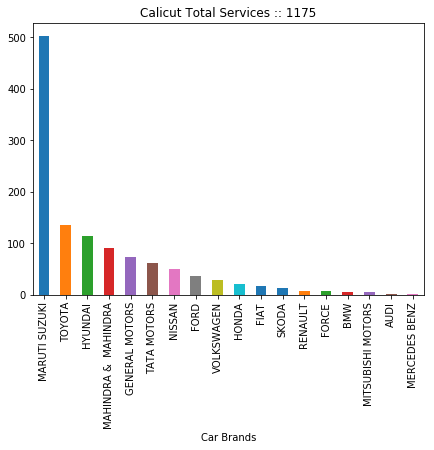

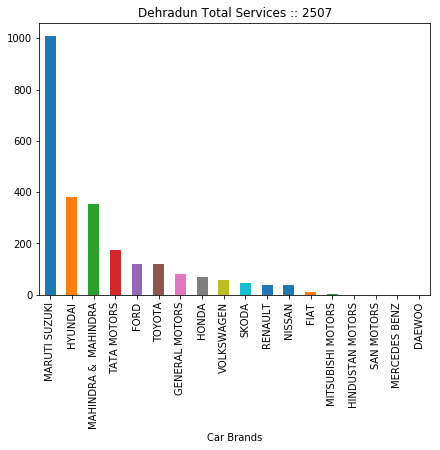

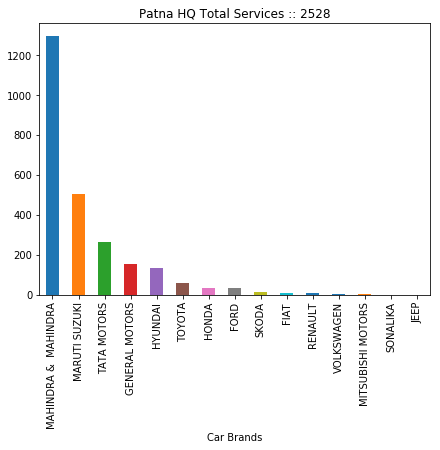

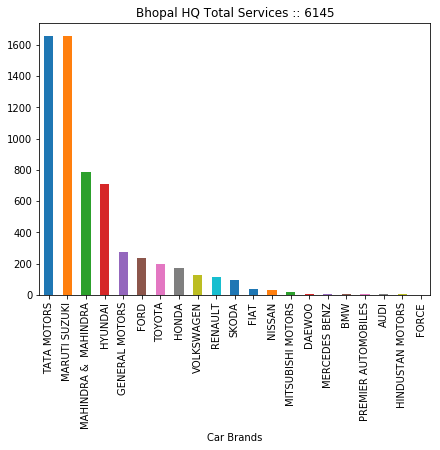

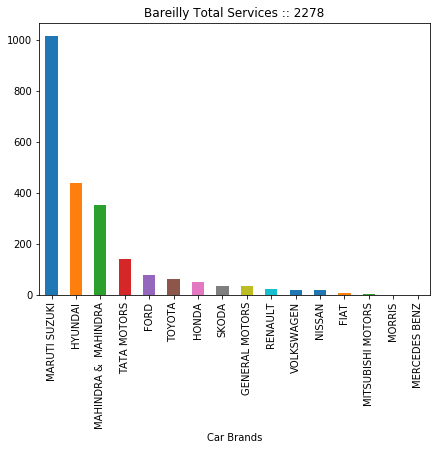

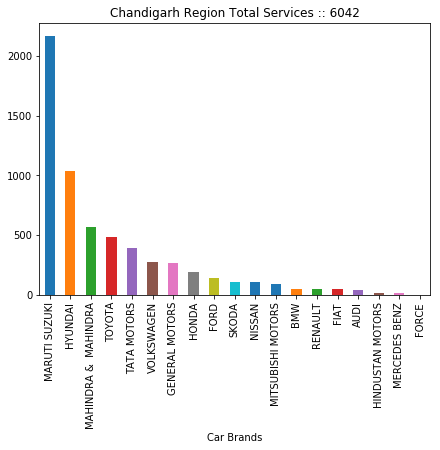

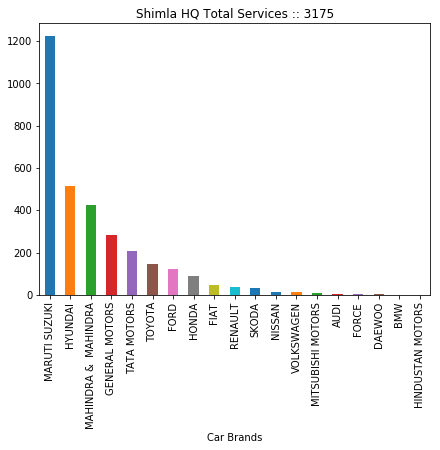

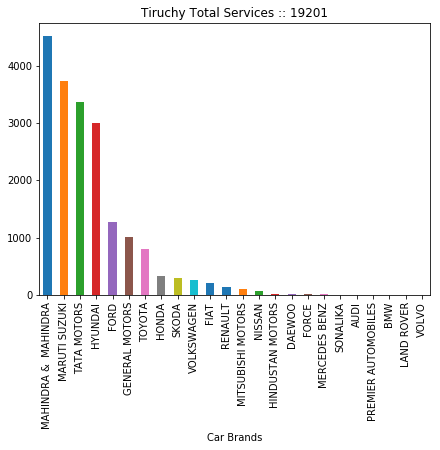

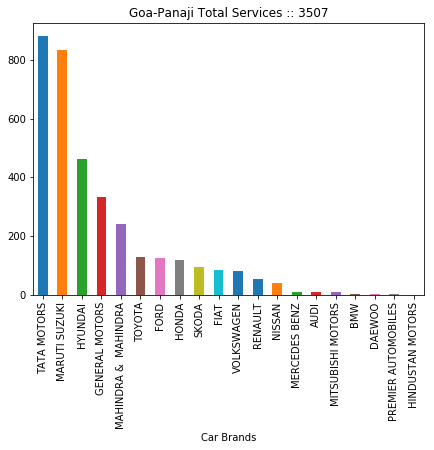

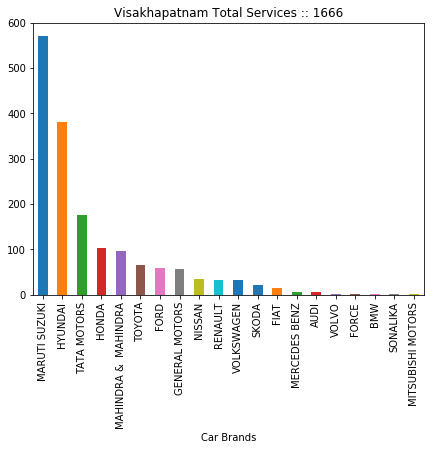

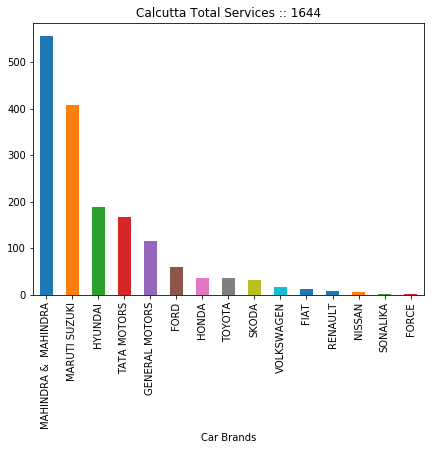

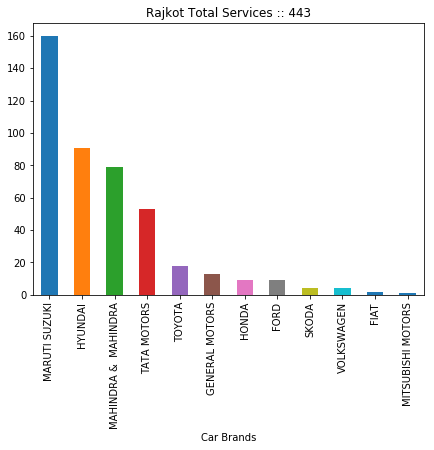

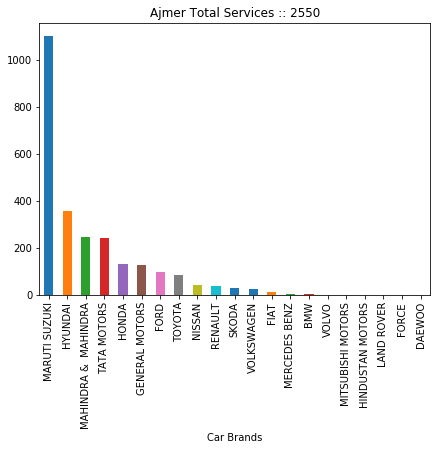

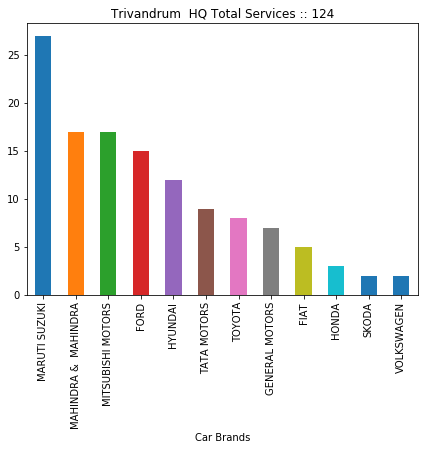

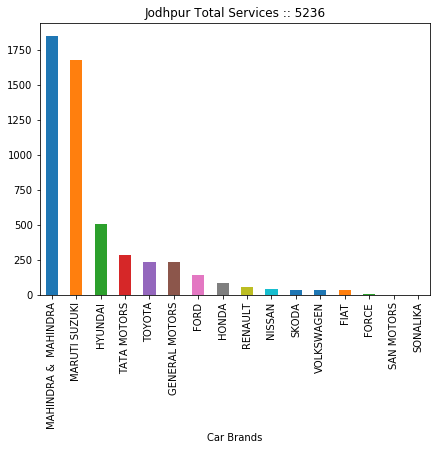

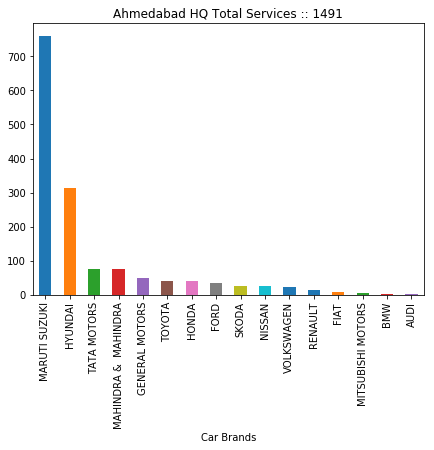

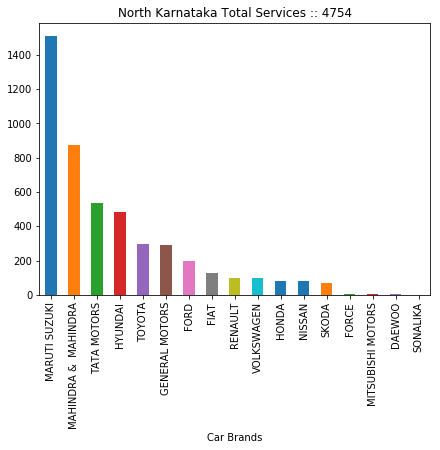

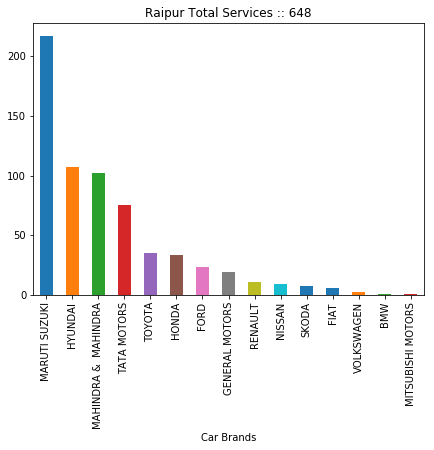

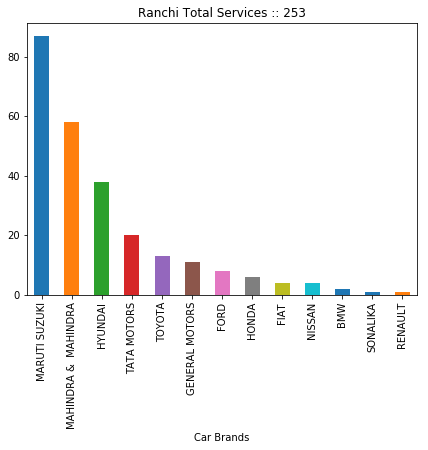

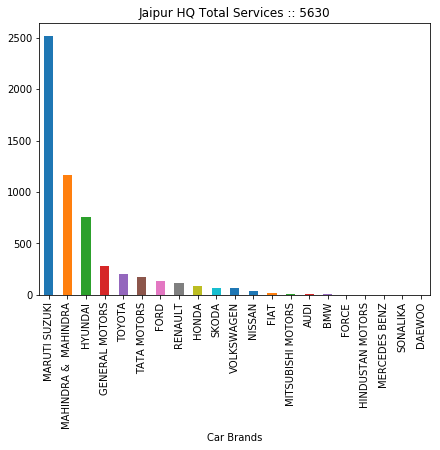

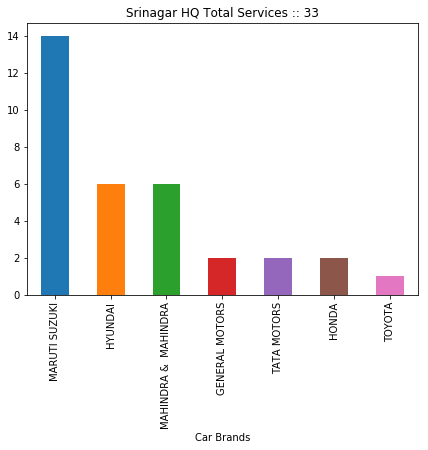

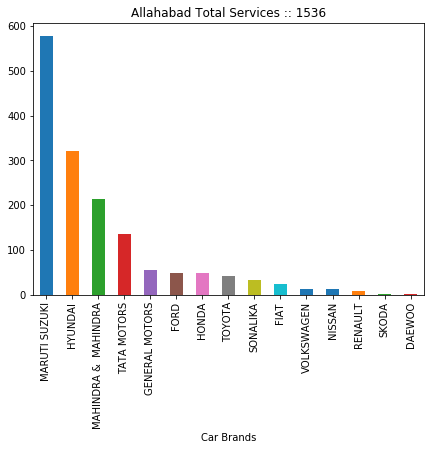

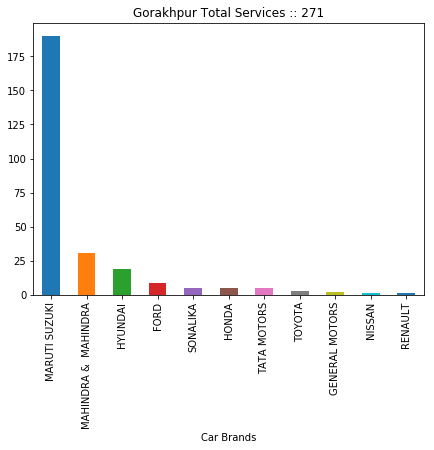

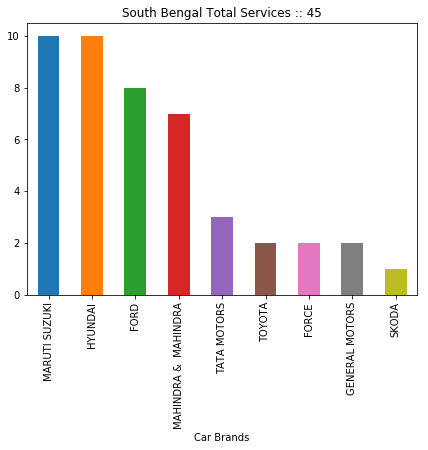

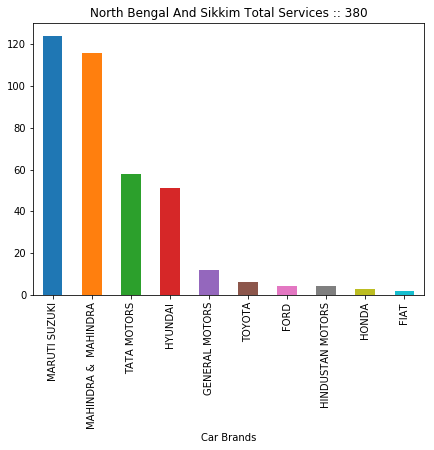

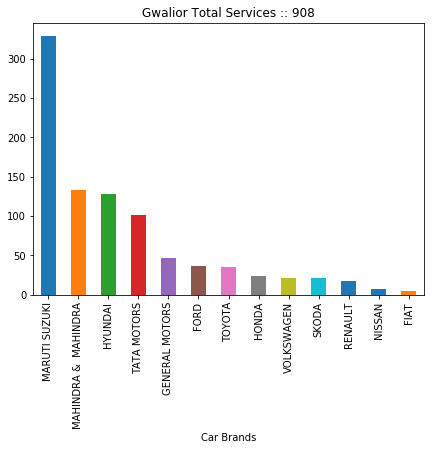

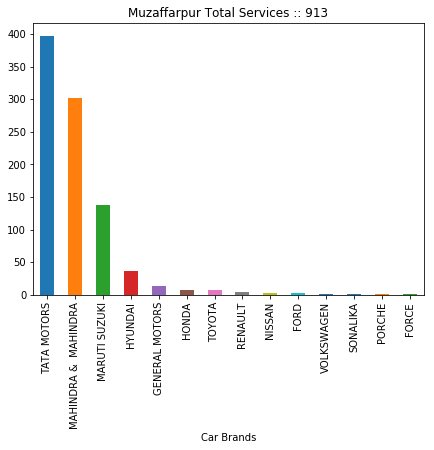

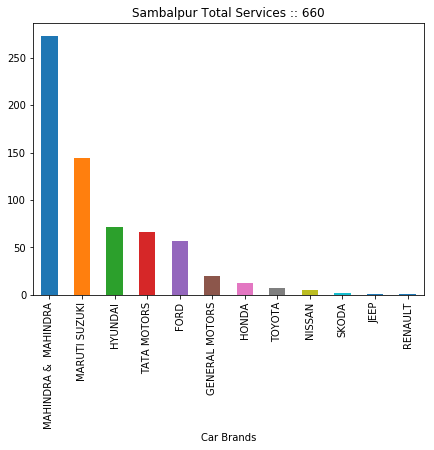

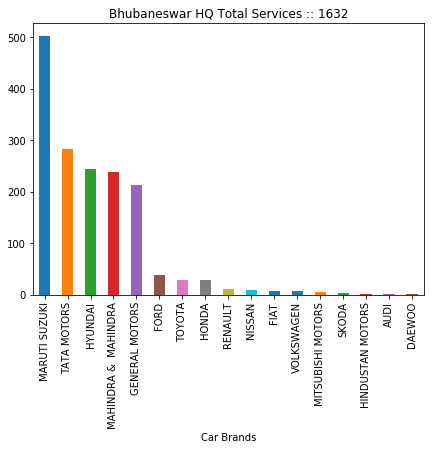

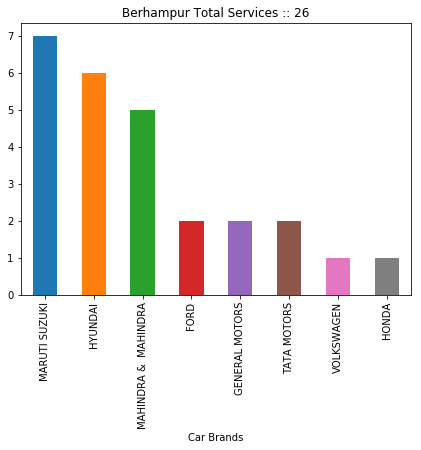

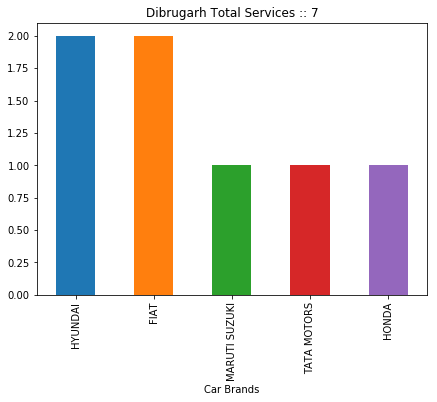

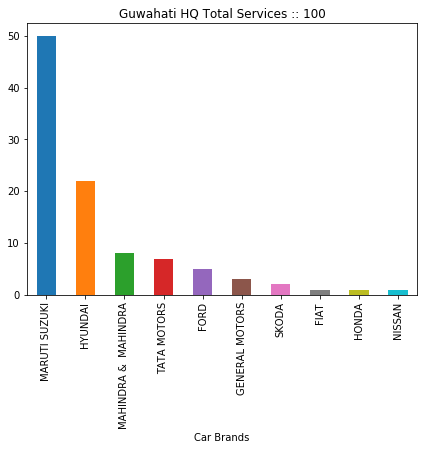

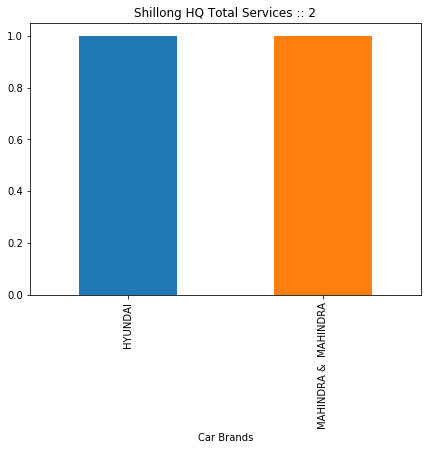

In [213]:
City = list(Final_Invoice_data['regionname'].unique())
for i in City:
    bar1 = Final_Invoice_data[Final_Invoice_data['regionname']==i]['Make'].value_counts()
    Serviced_Cars = len(Final_Invoice_data[Final_Invoice_data['regionname']==i])
    fig = plt.figure(figsize=(7, 5))
    bar1.plot(kind='bar')
    plt.title(i+' Total Services :: ' + str(Serviced_Cars))
    plt.xlabel('Car Brands')


City by Avg Revenue


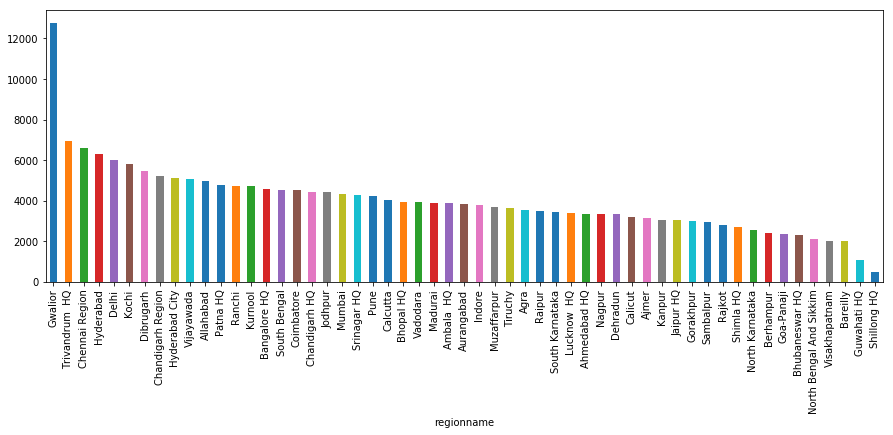

In [265]:
fig = plt.figure(figsize=(15, 5))
Final_Invoice_data.groupby('regionname')['Total Amt Wtd Tax.'].mean().sort_values(ascending=False).plot.bar()
print(style.BOLD+'City by Avg Revenue'+style.END)

State by Avg Revenue


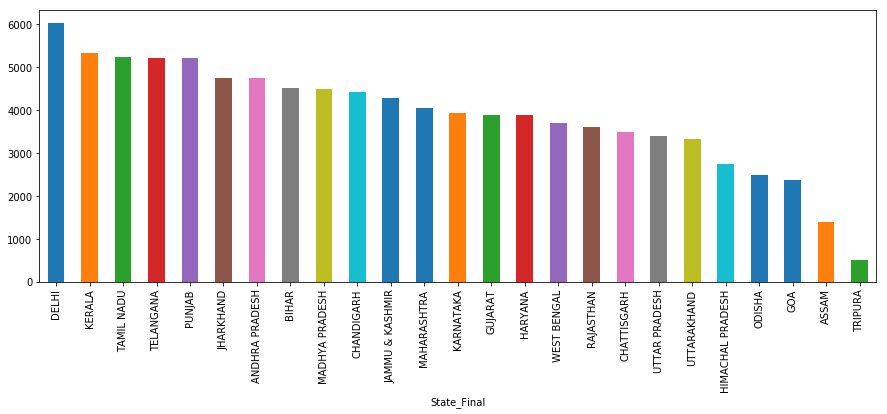

In [264]:
fig = plt.figure(figsize=(15, 5))
Final_Invoice_data.groupby('State_Final')['Total Amt Wtd Tax.'].mean().sort_values(ascending=False).plot.bar()
print(style.BOLD+'State by Avg Revenue'+style.END)

In [ ]:
Final_Invoice_data['Order Type']

In [261]:
# Final_Invoice_data[(Final_Invoice_data['regionname']=='Gwalior') & (Final_Invoice_data['Total Amt Wtd Tax.']>100000)]['Order Type']
print(style.BOLD + 'Out of 908 Services done in Gwalior 290 were Accidental i.e. 32%'+style.END)
print(' '*50)
print(round(Final_Invoice_data[(Final_Invoice_data['regionname']=='Gwalior')]['Order Type'].value_counts()/len(Final_Invoice_data[(Final_Invoice_data['regionname']=='Gwalior')])*100,2))


Out of 908 Services done in Gwalior 290 were Accidental i.e. 32%
                                                  
Running Repairs      53.19
Accidental           31.94
Paid Service         10.02
Mechanical            4.63
WBW Order             0.11
SMC Value Package     0.11
Name: Order Type, dtype: float64


In [247]:
Final_Invoice_data[(Final_Invoice_data['regionname']=='Gwalior')]['Order Type'].value_counts()

Running Repairs      483
Accidental           290
Paid Service          91
Mechanical            42
WBW Order              1
SMC Value Package      1
Name: Order Type, dtype: int64

In [268]:
Final_Invoice_data[(Final_Invoice_data['regionname']=='Gwalior')].groupby('Order Type')['Plant'].value_counts().unstack()

Plant,BC23,BC26,BC28,X010,X060,X092,X103,X118,X121,X156,X166,X170,X209
Order Type,,,,,,,,,,,,,
Accidental,NaN,1.0,NaN,NaN,NaN,NaN,NaN,270.0,NaN,NaN,19.0,NaN,NaN
Mechanical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,6.0
Paid Service,1.0,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,64.0,NaN,9.0
Running Repairs,1.0,NaN,1.0,2.0,1.0,2.0,3.0,432.0,1.0,NaN,31.0,2.0,7.0
SMC Value Package,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
WBW Order,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [307]:
Accidental_cases = pd.DataFrame(Final_Invoice_data[Final_Invoice_data['Order Type'] == 'Accidental']['regionname'].value_counts())
Accidental_cases.columns = ['Accidental Services']

In [308]:
total_city = pd.DataFrame(Final_Invoice_data['regionname'].value_counts())
total_city.columns = ['Total Services']

In [309]:
Accidental_cases = pd.concat([Accidental_cases,total_city],axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [310]:
Total_revenue = pd.DataFrame(round(Final_Invoice_data.groupby('regionname')['Total Amt Wtd Tax.'].sum()/10000000,2))

In [311]:
Total_revenue.columns=['Total Revenue in Crore']


In [312]:
Accidental_cases = pd.concat([Accidental_cases,Total_revenue],axis=1)

In [314]:
Accidental_revenue = pd.DataFrame(round(Final_Invoice_data[Final_Invoice_data['Order Type']=='Accidental'].groupby('regionname')['Total Amt Wtd Tax.'].sum()/10000000,2))

In [316]:
Accidental_revenue.columns = ['Revenue From Accidental Services in Crore']

In [317]:
Accidental_cases = pd.concat([Accidental_cases,Accidental_revenue],axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [321]:
Accidental_cases['Revenue From Accidental Services(%)'] = round((Accidental_cases['Revenue From Accidental Services in Crore'] / Accidental_cases['Total Revenue in Crore'])*100,2)

In [324]:
Accidental_cases.sort_values(by='Revenue From Accidental Services in Crore',ascending=False)

,Accidental Services,Total Services,Total Revenue in Crore,Revenue From Accidental Services in Crore,Revenue From Accidental Services(%)
Chennai Region,6271.0,52730,34.92,12.26,35.11
Pune,3354.0,41626,17.70,5.08,28.70
Hyderabad City,3130.0,27157,13.93,4.44,31.87
Aurangabad,2794.0,35904,13.88,4.11,29.61
Mumbai,2802.0,30424,13.26,4.10,30.92
Chandigarh HQ,1999.0,19169,8.49,4.03,47.47
Coimbatore,2394.0,29389,13.27,4.01,30.22
Bangalore HQ,2618.0,22694,10.38,3.29,31.70
Vadodara,1986.0,24292,9.56,3.20,33.47
Ambala HQ,1590.0,17812,6.90,2.95,42.75


In [327]:
Accidental_cases_state = pd.DataFrame(Final_Invoice_data[Final_Invoice_data['Order Type'] == 'Accidental']['State_Final'].value_counts())
Accidental_cases_state.columns = ['Accidental Services']
total_State = pd.DataFrame(Final_Invoice_data['State_Final'].value_counts())
total_State.columns = ['Total Services']
Accidental_cases_state = pd.concat([Accidental_cases_state,total_State],axis=1)
Total_revenue_state = pd.DataFrame(round(Final_Invoice_data.groupby('State_Final')['Total Amt Wtd Tax.'].sum()/10000000,2))
Total_revenue_state.columns=['Total Revenue in Crore']
Accidental_cases_state = pd.concat([Accidental_cases_state,Total_revenue_state],axis=1)
Accidental_revenue_state = pd.DataFrame(round(Final_Invoice_data[Final_Invoice_data['Order Type']=='Accidental'].groupby('State_Final')['Total Amt Wtd Tax.'].sum()/10000000,2))
Accidental_revenue_state.columns = ['Revenue From Accidental Services in Crore']
Accidental_cases_state = pd.concat([Accidental_cases_state,Accidental_revenue_state],axis=1)
Accidental_cases_state['Revenue From Accidental Services(%)'] = round((Accidental_cases_state['Revenue From Accidental Services in Crore'] / Accidental_cases_state['Total Revenue in Crore'])*100,2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [329]:
Accidental_cases_state.sort_values(by='Revenue From Accidental Services in Crore',ascending=False)

,Accidental Services,Total Services,Total Revenue in Crore,Revenue From Accidental Services in Crore,Revenue From Accidental Services(%)
TAMIL NADU,11608.0,118028,61.71,20.65,33.46
MAHARASHTRA,9861.0,124696,50.45,14.54,28.82
KARNATAKA,3814.0,44066,17.30,5.53,31.97
TELANGANA,3424.0,29261,15.25,5.14,33.70
CHANDIGARH,1999.0,19169,8.49,4.03,47.47
ANDHRA PRADESH,1851.0,19222,9.11,3.86,42.37
GUJARAT,2145.0,26226,10.18,3.45,33.89
UTTAR PRADESH,2082.0,31434,10.68,3.40,31.84
MADHYA PRADESH,1267.0,13473,6.03,3.10,51.41
HARYANA,1590.0,17812,6.90,2.95,42.75


In [334]:
# Final_Invoice_data.groupby('Plant')['regionname'].value_counts().unstack()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


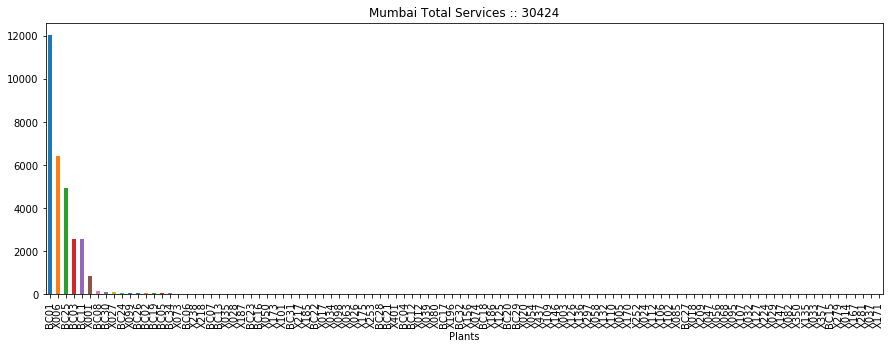

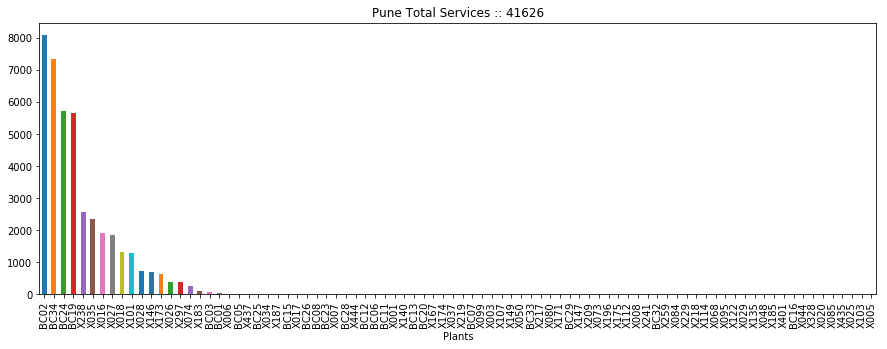

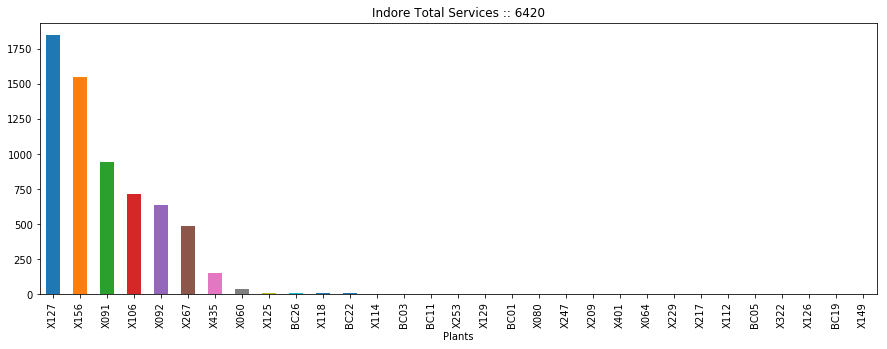

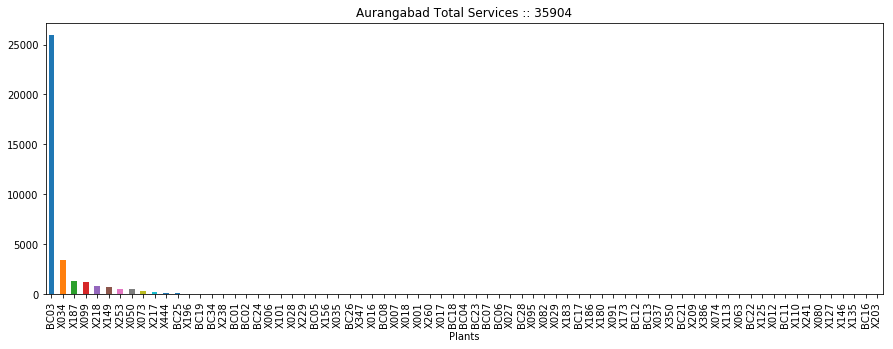

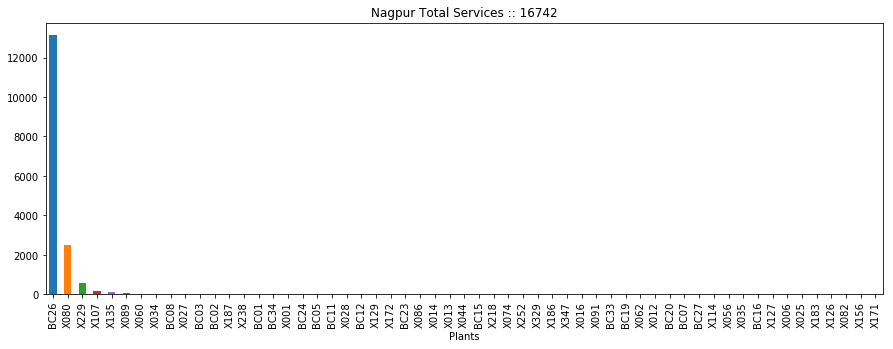

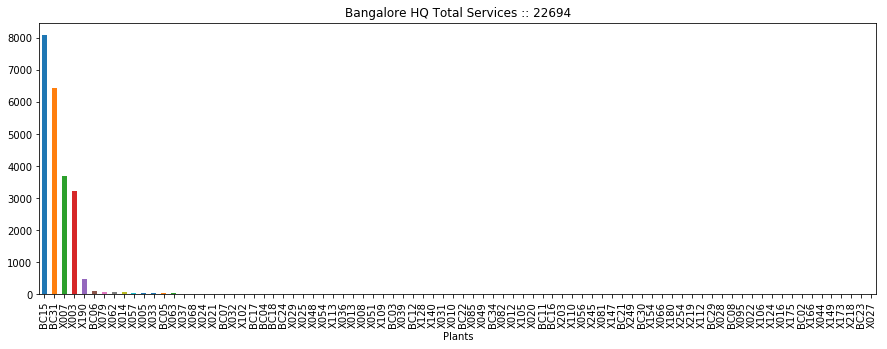

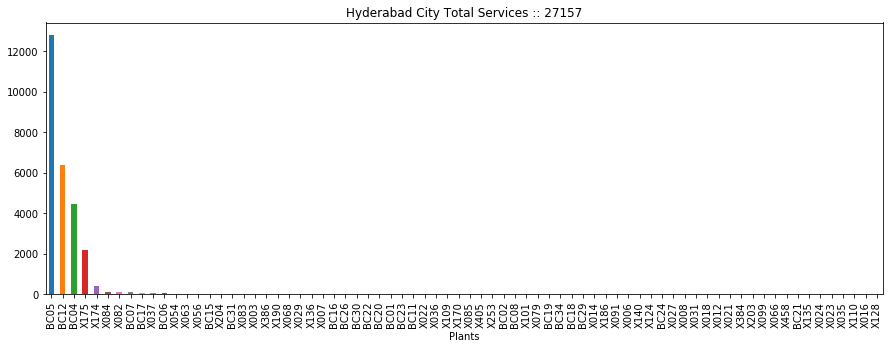

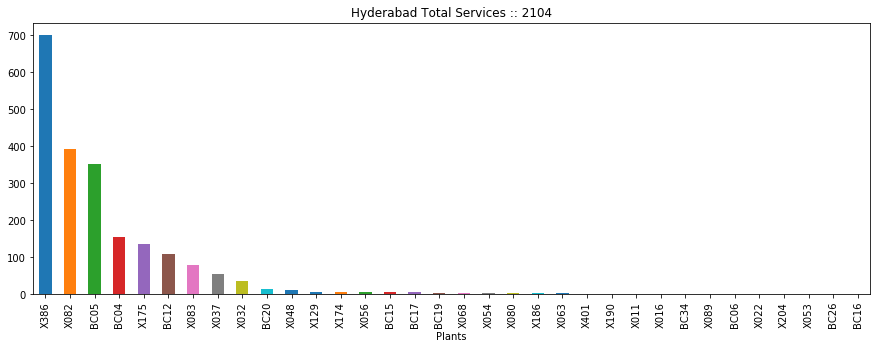

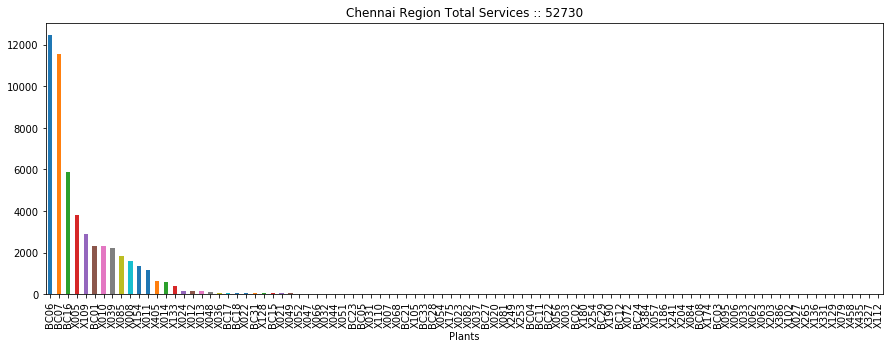

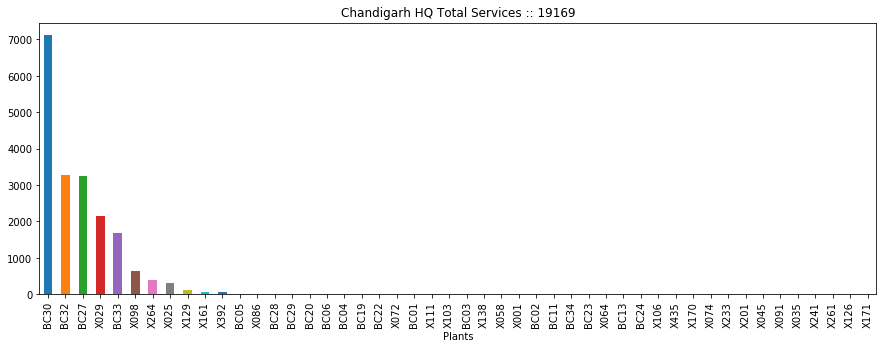

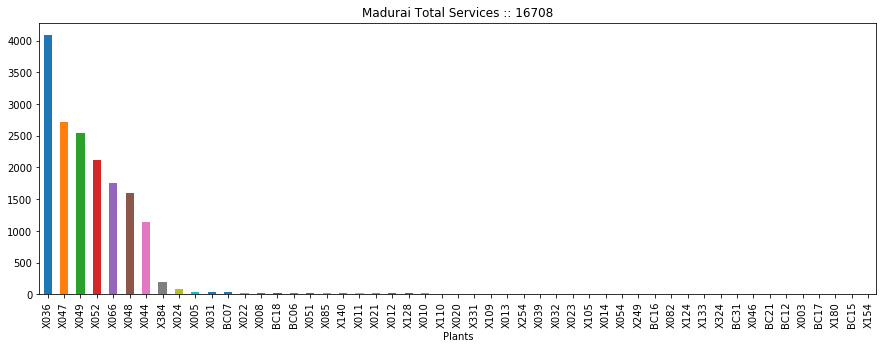

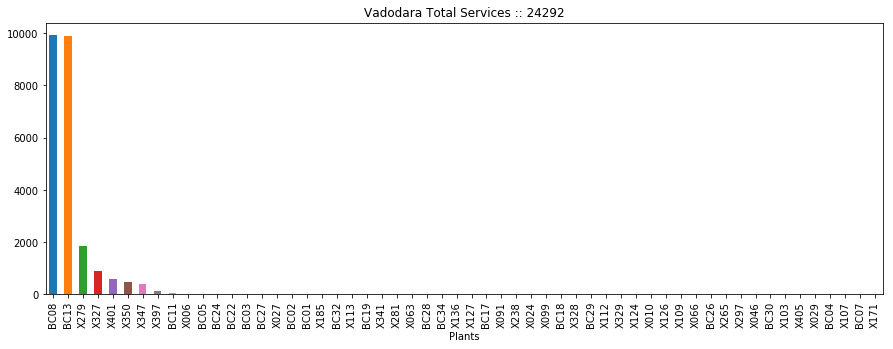

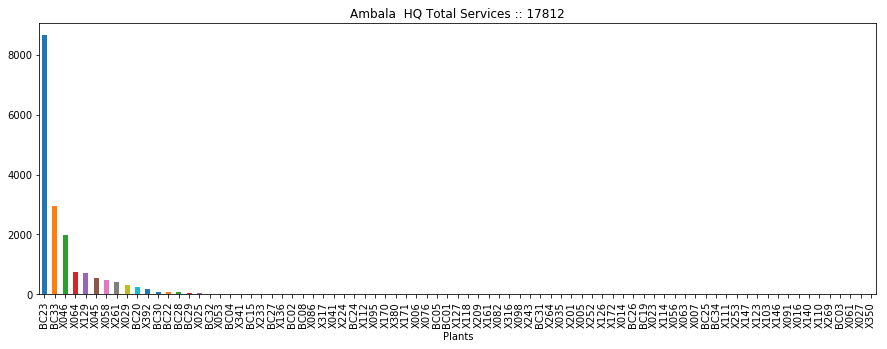

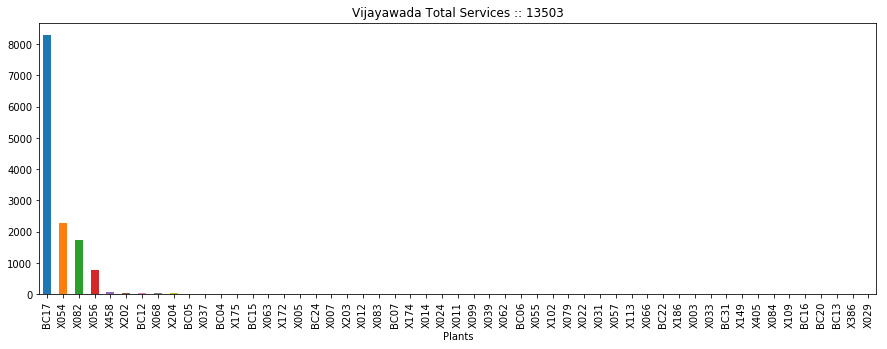

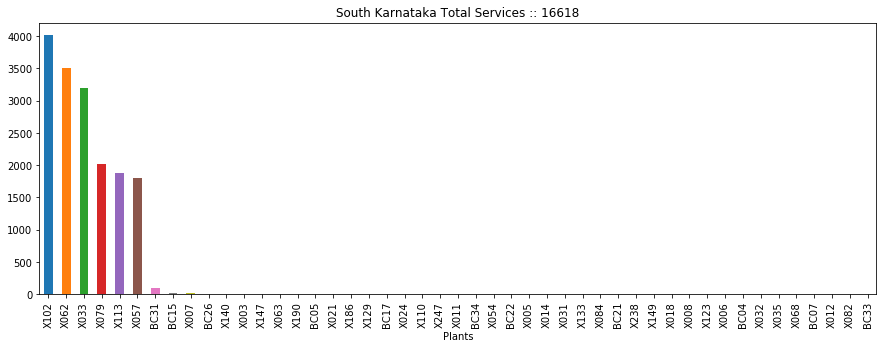

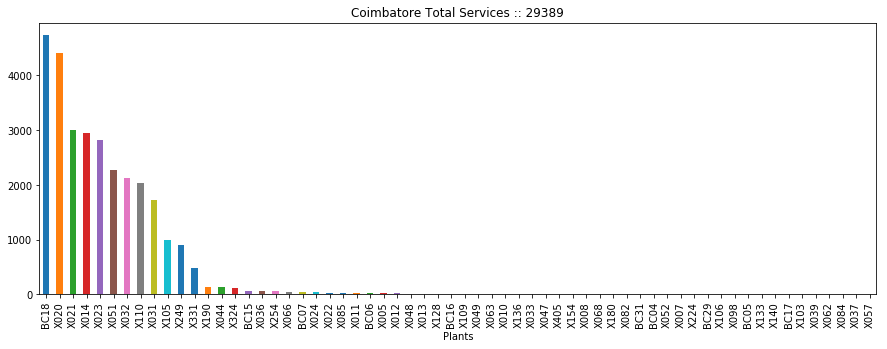

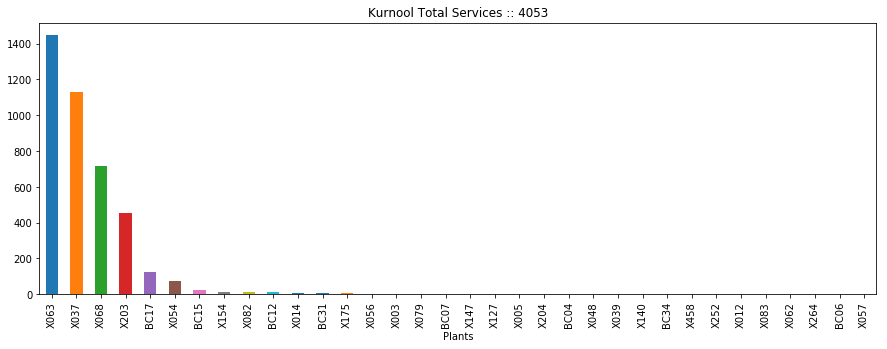

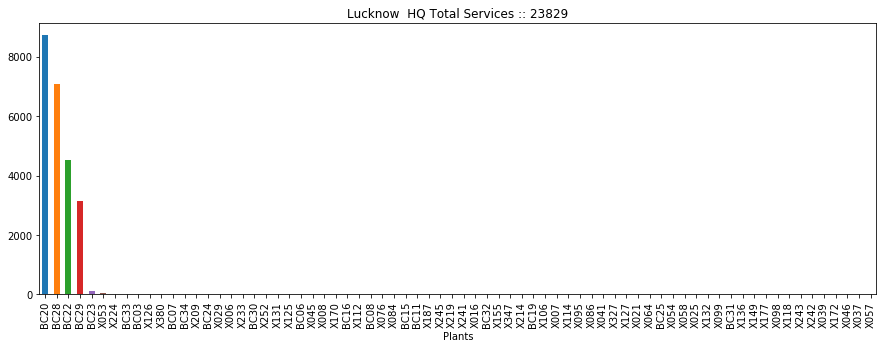

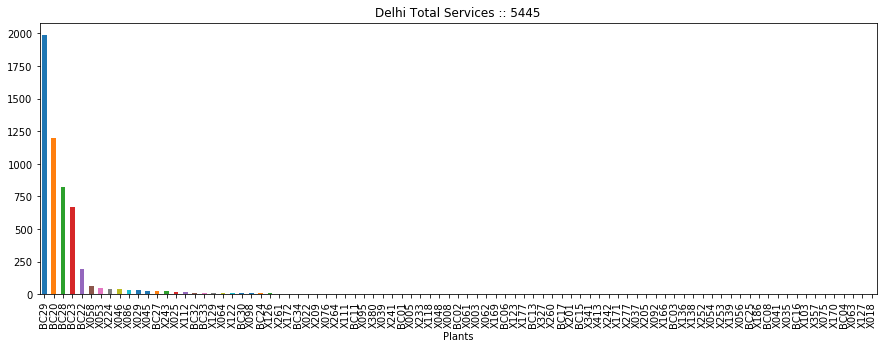

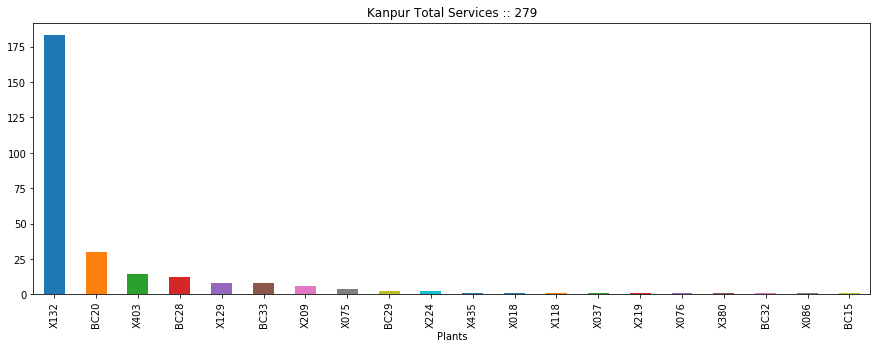

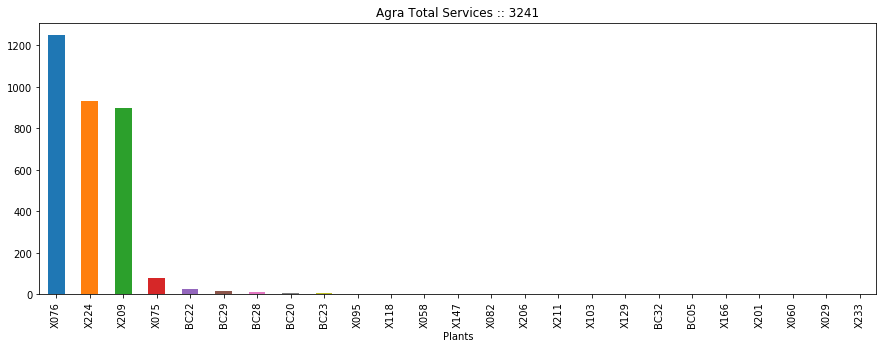

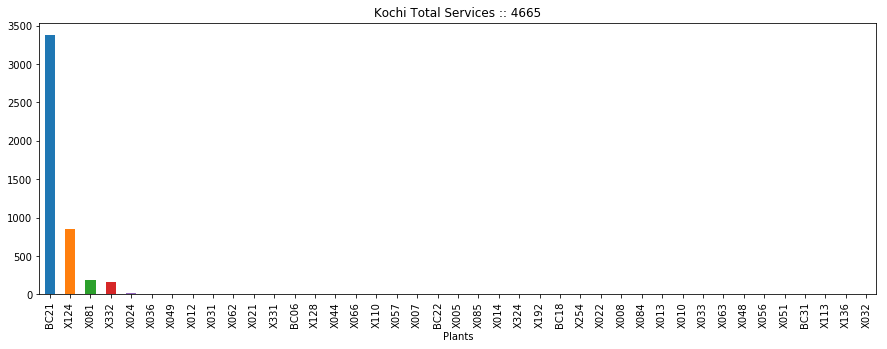

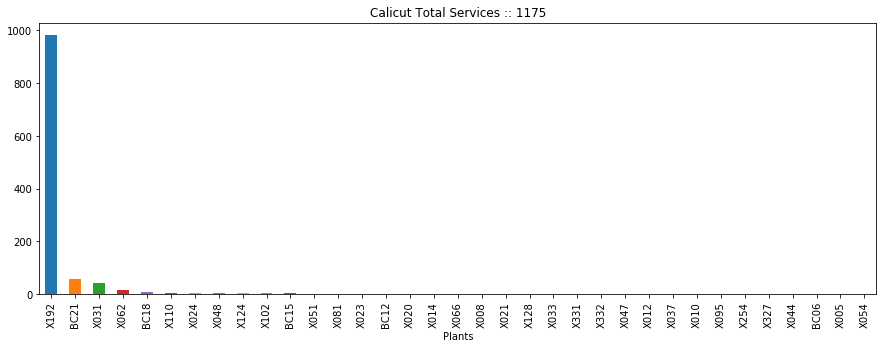

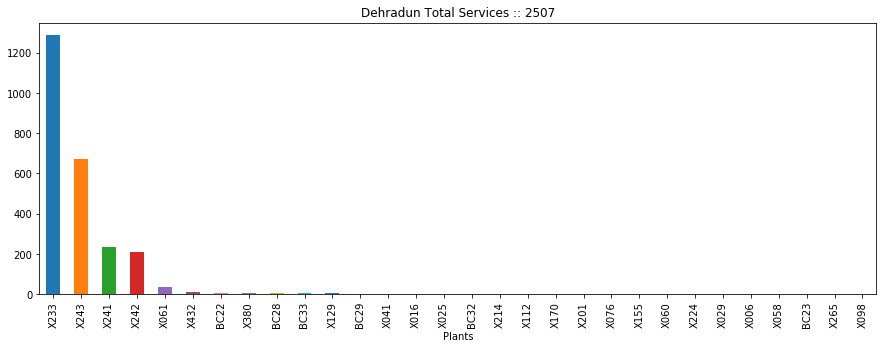

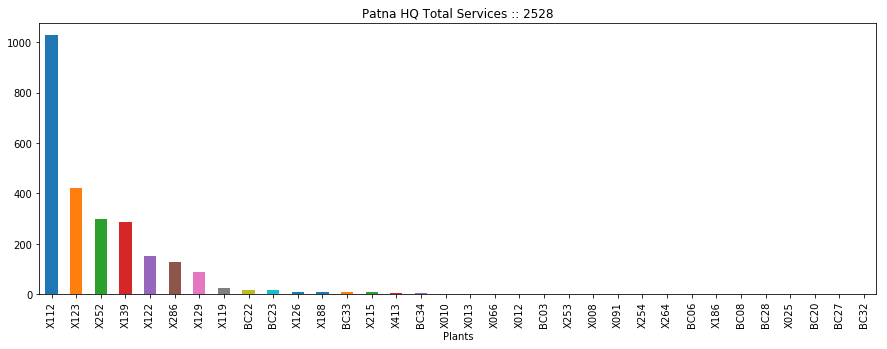

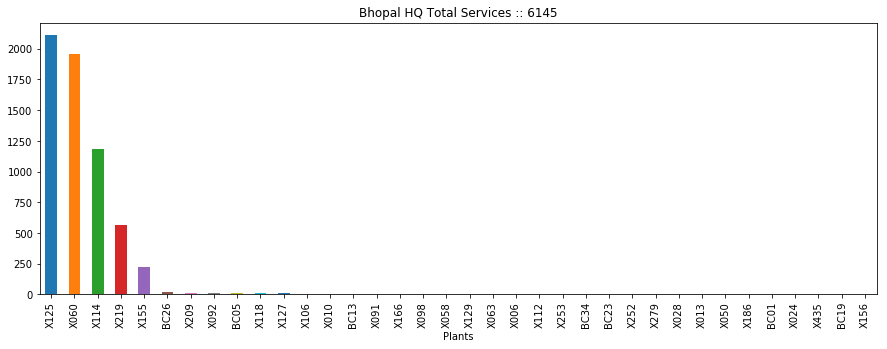

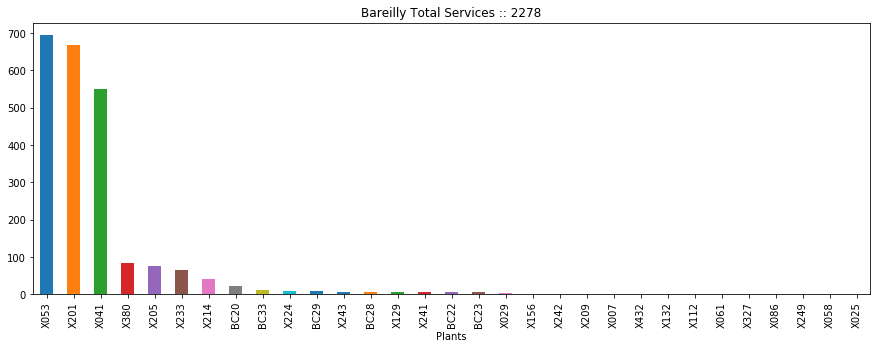

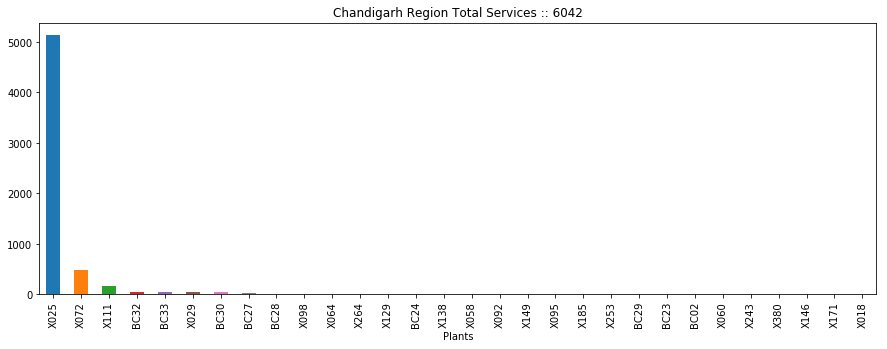

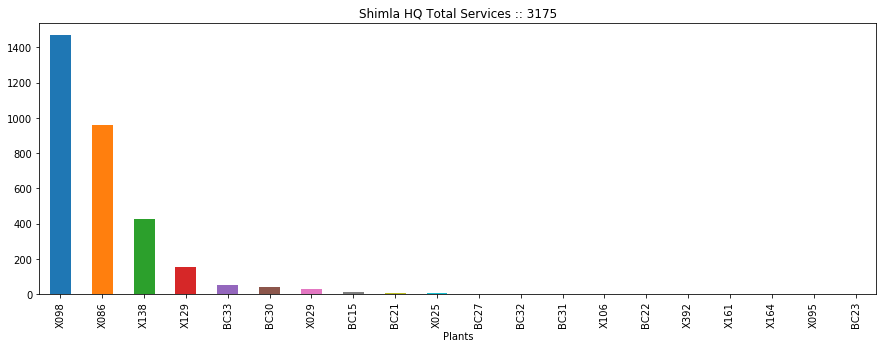

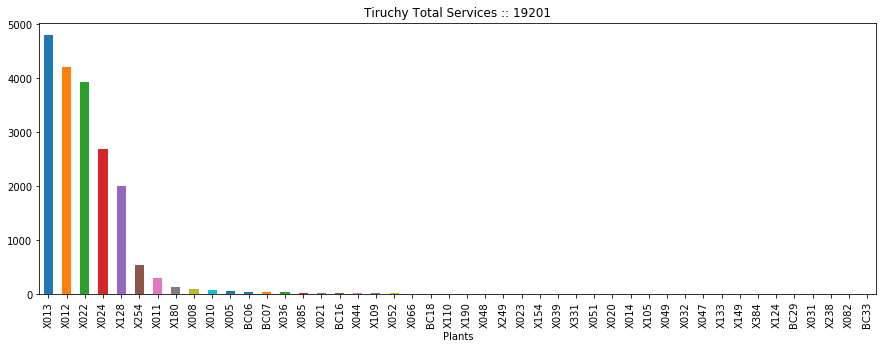

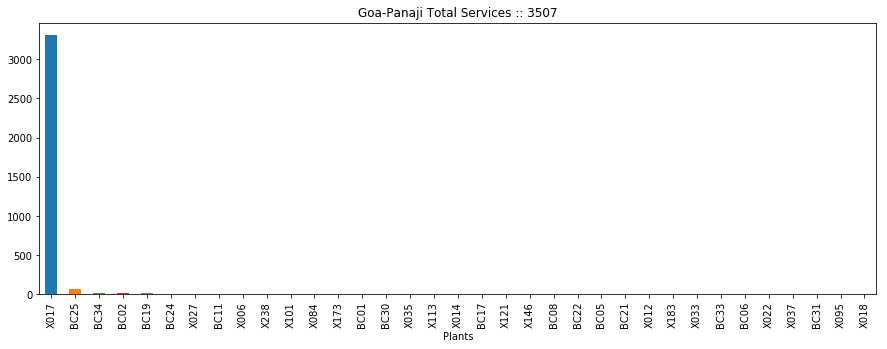

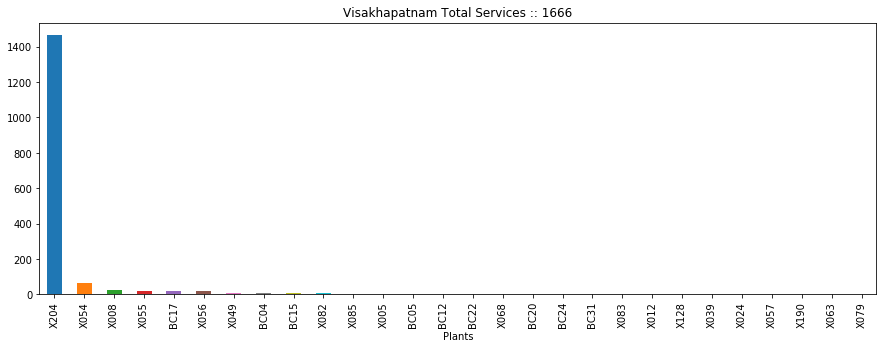

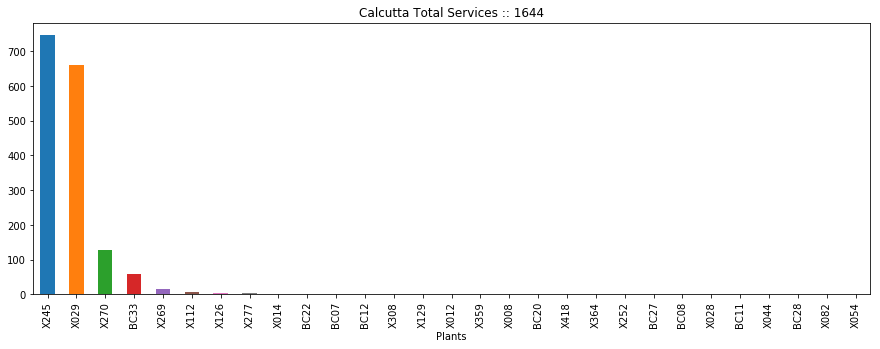

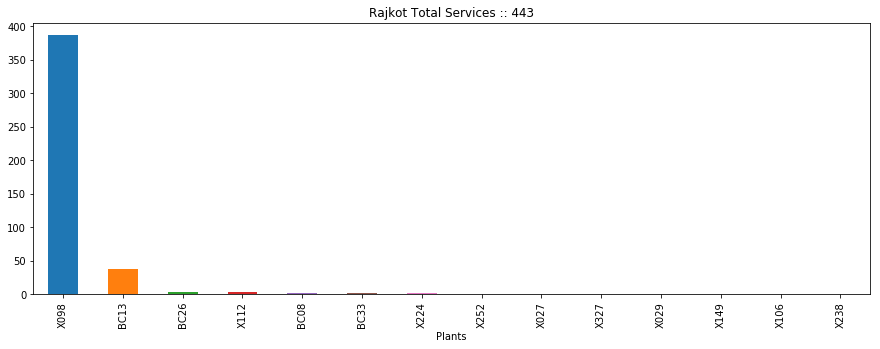

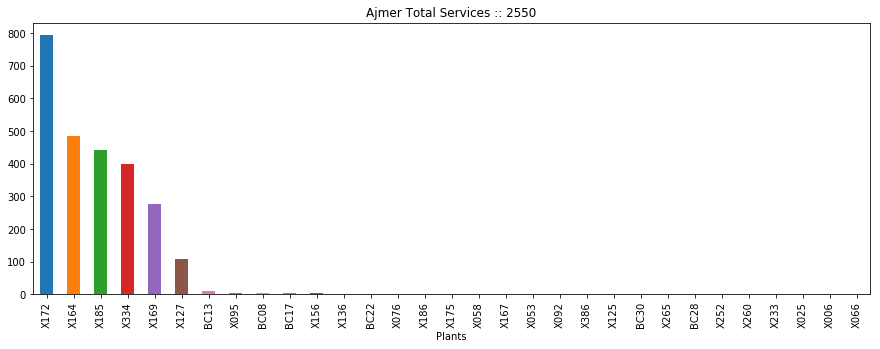

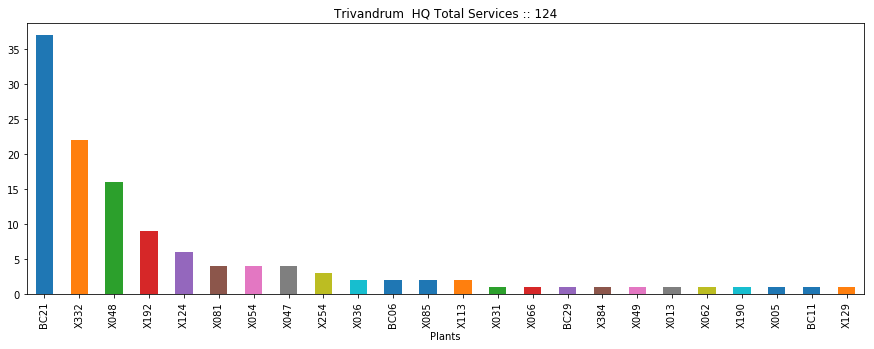

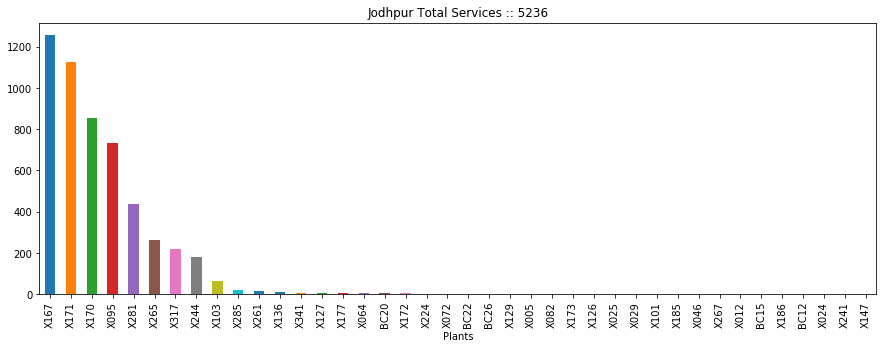

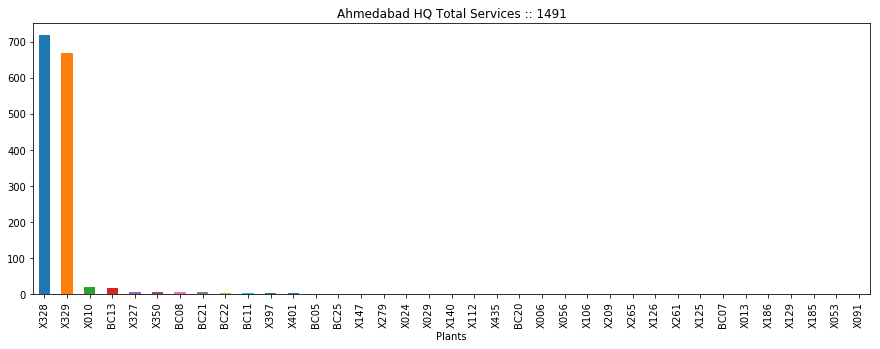

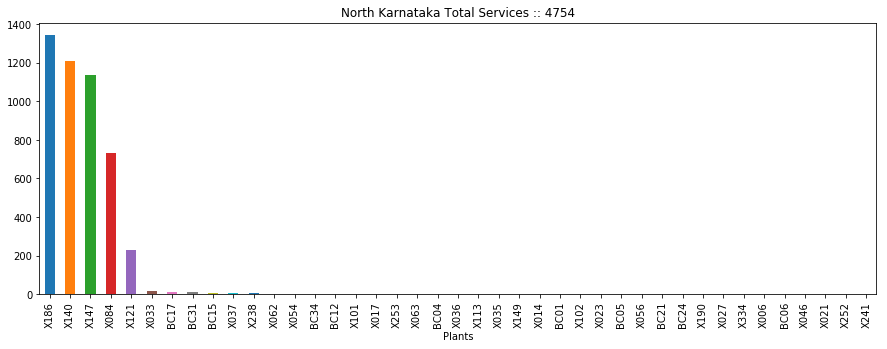

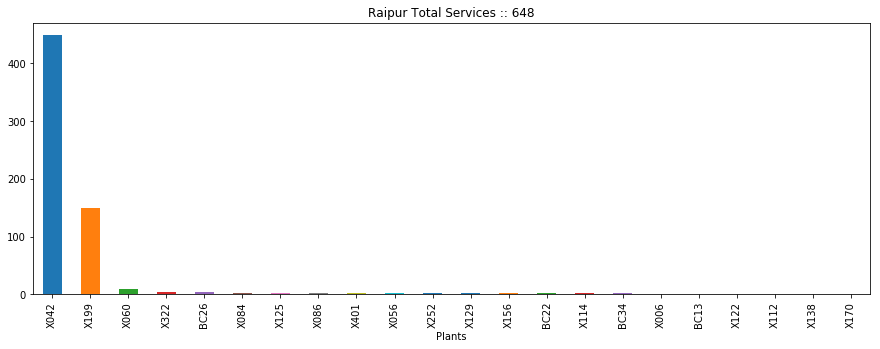

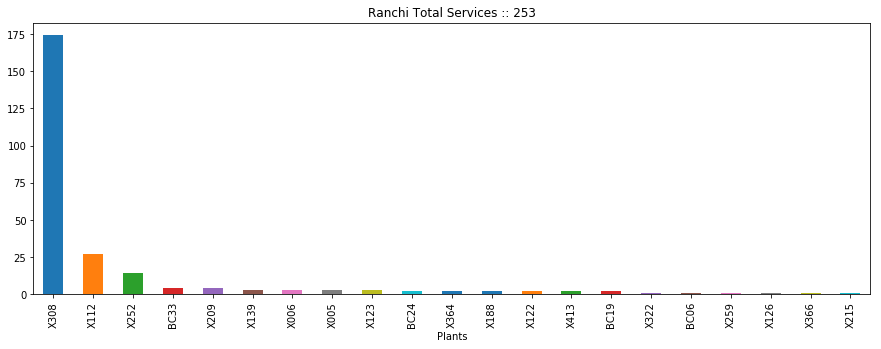

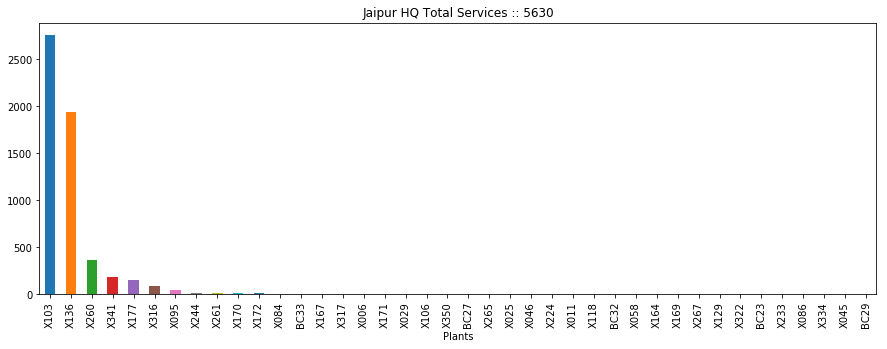

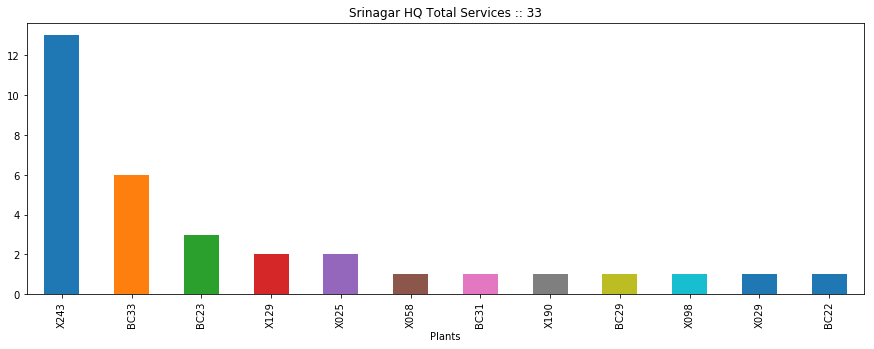

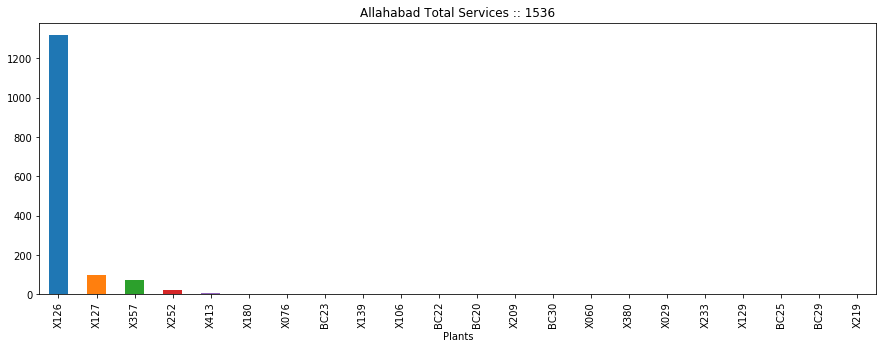

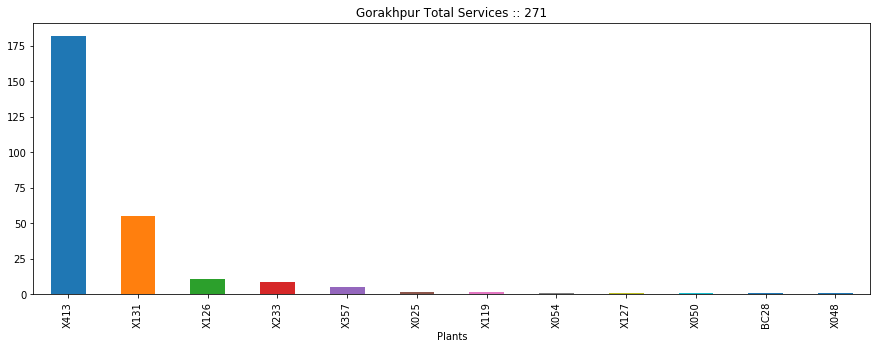

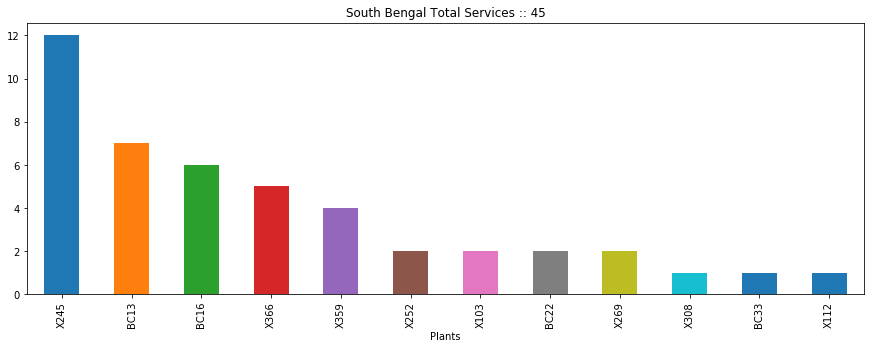

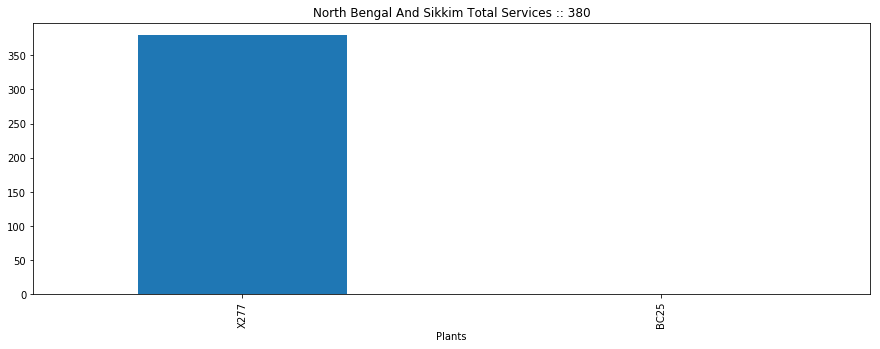

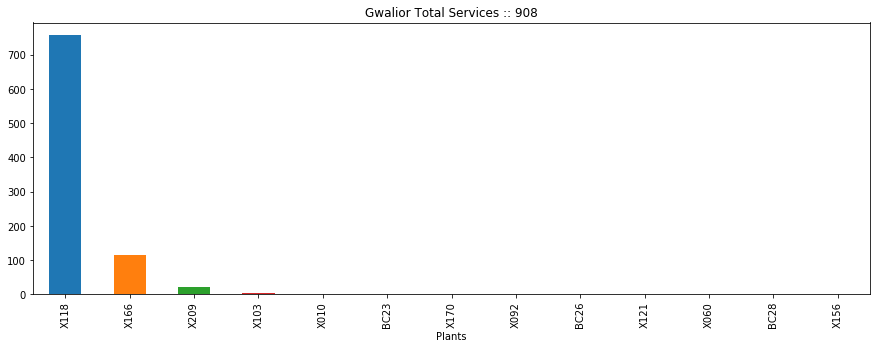

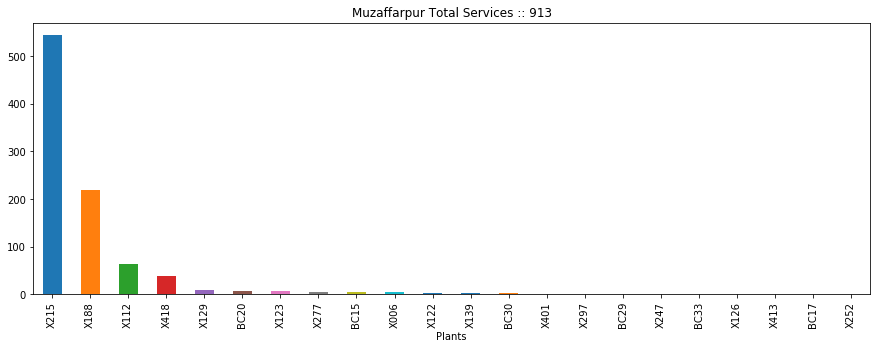

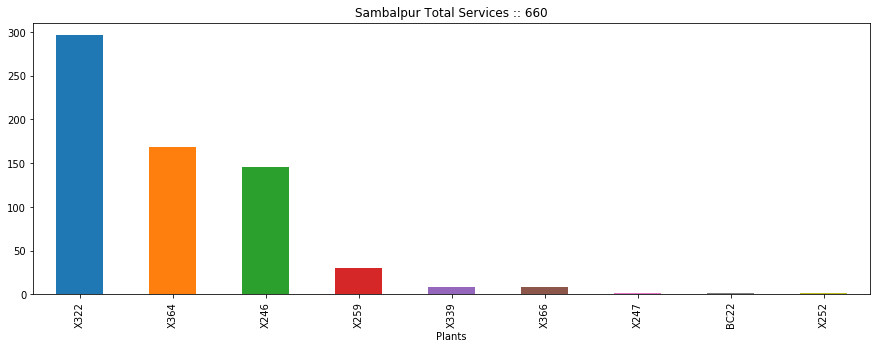

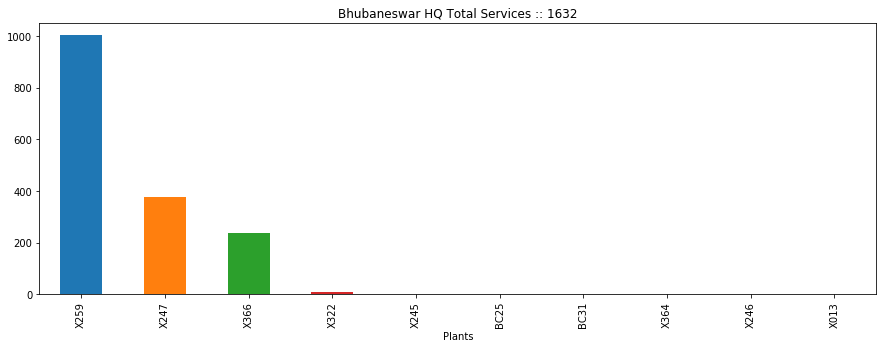

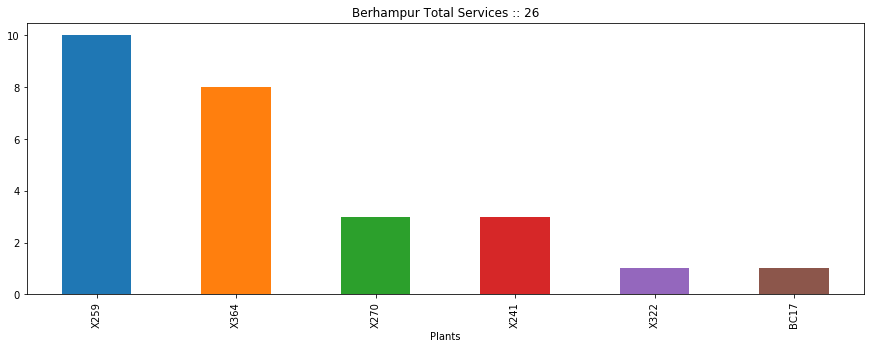

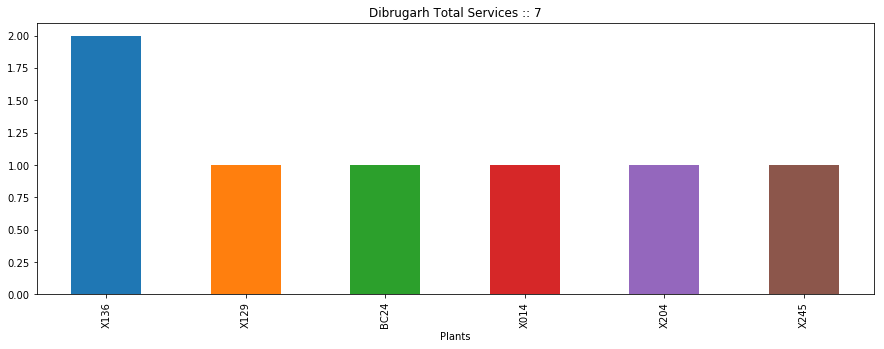

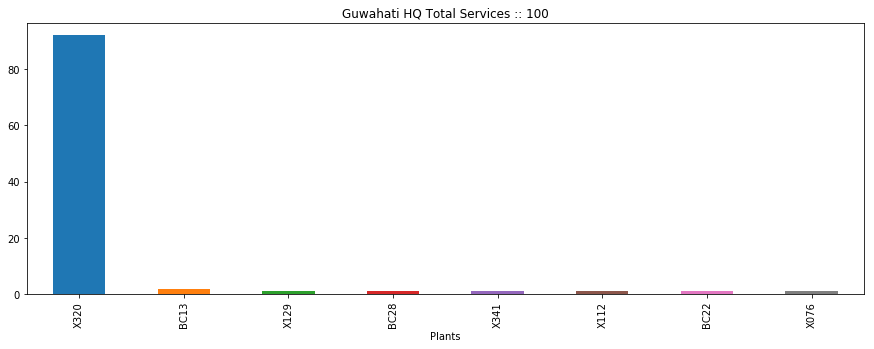

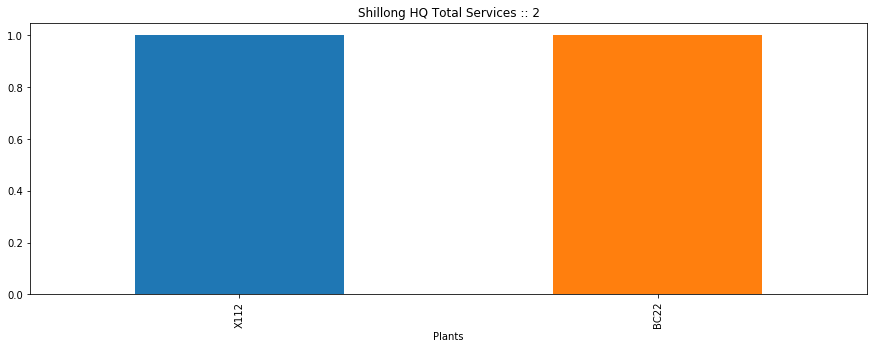

In [337]:
for i in City:
    bar1 = Final_Invoice_data[Final_Invoice_data['regionname']==i]['Plant'].value_counts()
    Serviced_Cars = len(Final_Invoice_data[Final_Invoice_data['regionname']==i])
    fig = plt.figure(figsize=(15, 5))
    bar1.plot(kind='bar')
    plt.title(i+' Total Services :: ' + str(Serviced_Cars))
    plt.xlabel('Plants')


In [5]:
Final_Invoice_data=pd.read_excel(r'../Capstone/Input Files/Final_Invoice_data.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


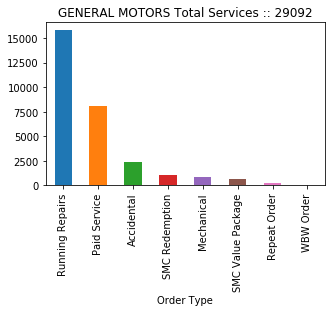

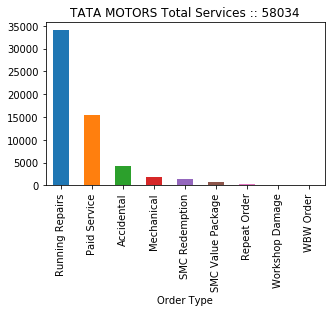

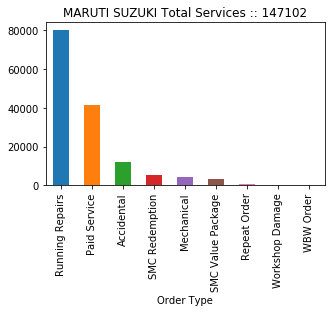

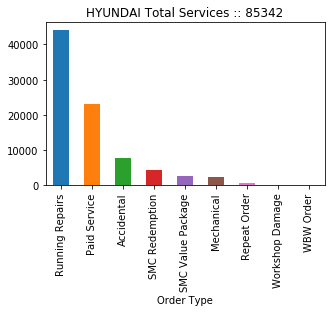

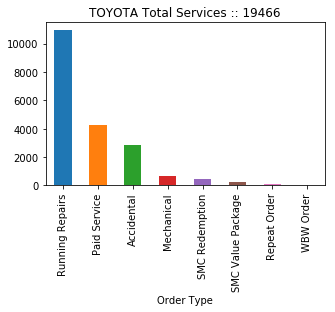

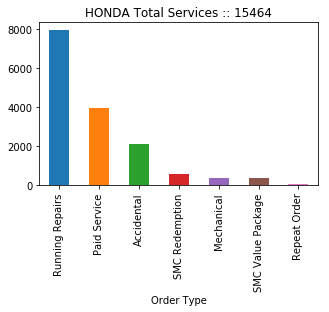

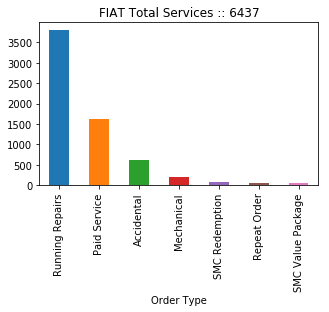

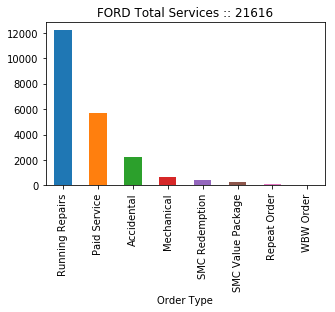

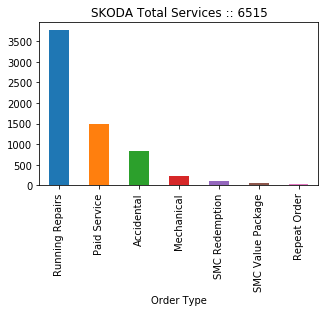

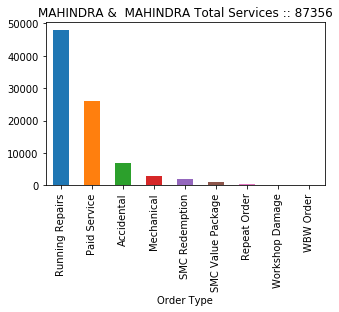

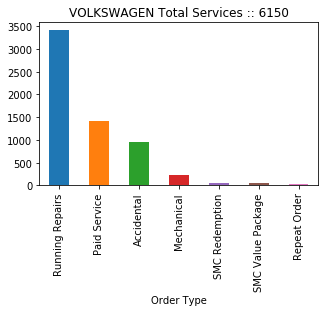

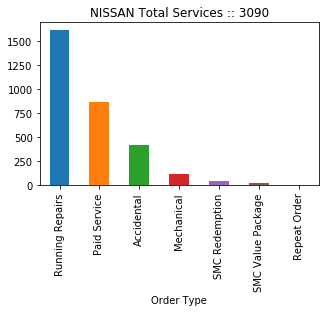

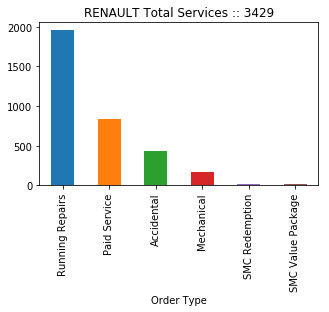

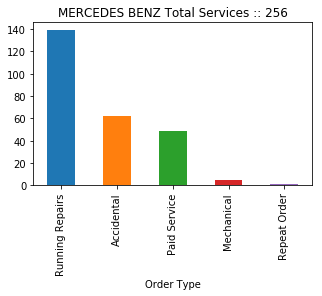

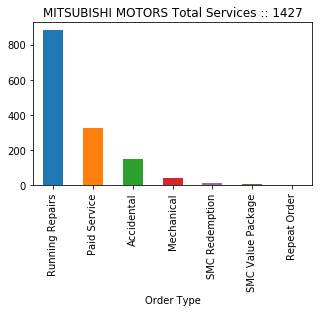

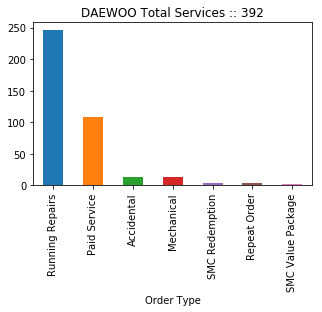

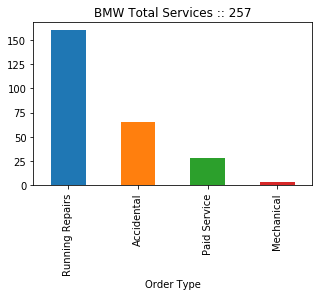

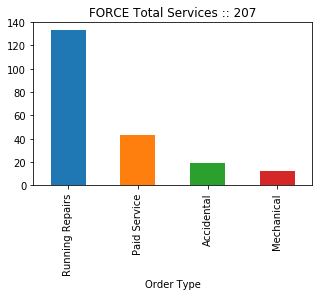

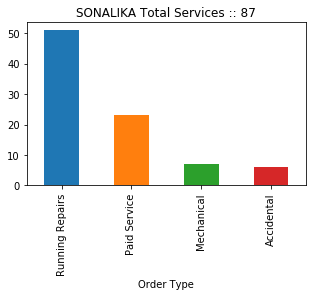

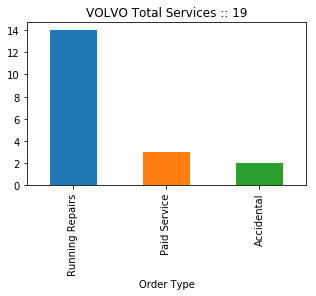

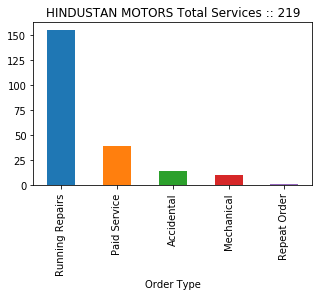

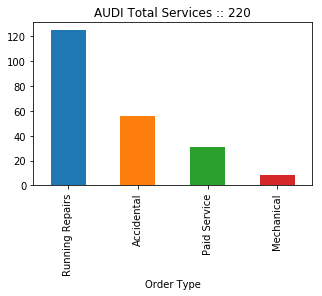

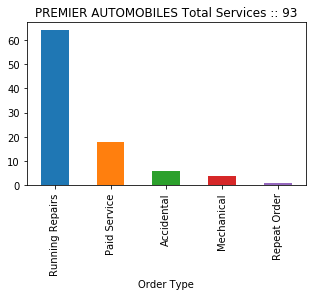

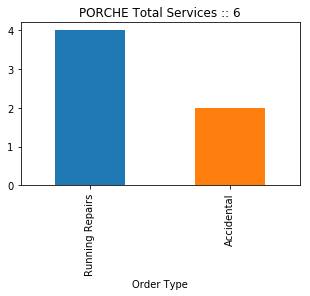

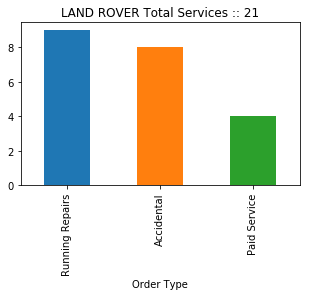

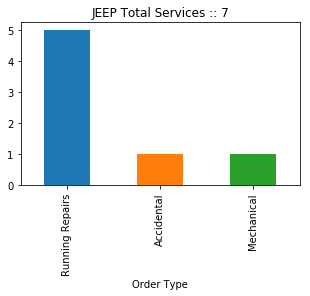

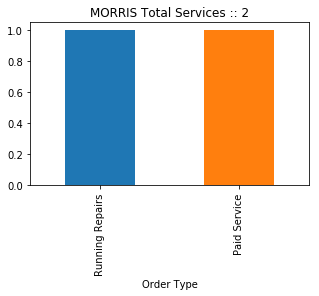

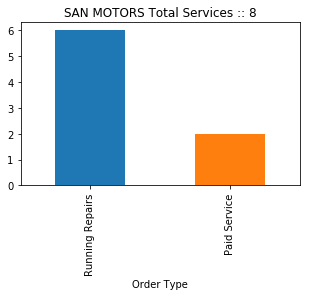

In [6]:
Make = list(Final_Invoice_data['Make'].unique())

for i in Make:
    bar1 = Final_Invoice_data[Final_Invoice_data['Make']==i]['Order Type'].value_counts()
    Serviced_Cars = len(Final_Invoice_data[Final_Invoice_data['Make']==i])
    fig = plt.figure(figsize=(5, 3))
    bar1.plot(kind='bar')
    plt.title(i+' Total Services :: ' + str(Serviced_Cars))
    plt.xlabel('Order Type')

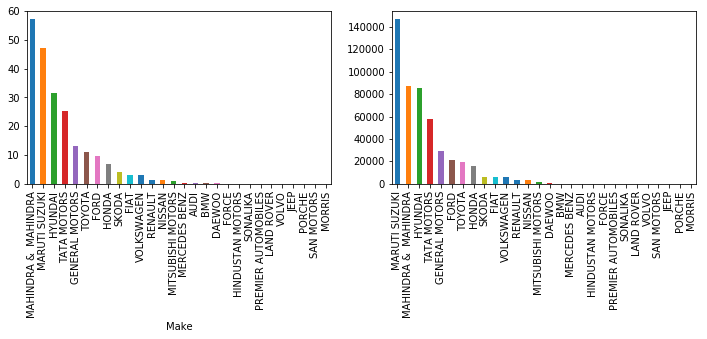

In [20]:
Make_Revenue = (Final_Invoice_data.groupby('Make')['Total Amt Wtd Tax.'].sum()/10000000).sort_values(ascending=False)
Make_Count = Final_Invoice_data['Make'].value_counts()
fig = plt.figure(figsize=(12, 7))
plt.subplot(2, 2, 1)
Make_Revenue.plot(kind='bar')
plt.subplot(2, 2, 2)
Make_Count.plot(kind='bar')


In [ ]:
Final_Invoice_data['Order Type']

In [21]:
Final_Invoice_data.groupby('Cust Type')['Order Type'].value_counts()

Cust Type         Order Type       
Corporate others  Running Repairs         334
                  Paid Service            172
                  Accidental               51
                  Mechanical               10
                  Repeat Order              6
                  SMC Value Package         4
                  SMC Redemption            2
Corporate- M&M    Running Repairs         135
                  Paid Service             81
                  Accidental               30
                  SMC Value Package         3
                  Mechanical                2
                  SMC Redemption            2
                  Repeat Order              1
Fleets            Running Repairs        1311
                  Paid Service            715
                  Accidental              181
                  Repeat Order              6
                  Mechanical                4
                  Workshop Damage           1
Franchise         Running Repairs          1

In [22]:
Final_Invoice_data['Order Type'].value_counts()

Running Repairs      269455
Paid Service         135004
Accidental            44159
SMC Redemption        15738
Mechanical            15100
SMC Value Package      9781
Repeat Order           3043
Workshop Damage          17
WBW Order                17
Name: Order Type, dtype: int64

In [23]:
Final_Invoice_data['Make'].value_counts()

MARUTI SUZUKI           147102
MAHINDRA &  MAHINDRA     87356
HYUNDAI                  85342
TATA MOTORS              58034
GENERAL MOTORS           29092
FORD                     21616
TOYOTA                   19466
HONDA                    15464
SKODA                     6515
FIAT                      6437
VOLKSWAGEN                6150
RENAULT                   3429
NISSAN                    3090
MITSUBISHI MOTORS         1427
DAEWOO                     392
BMW                        257
MERCEDES BENZ              256
AUDI                       220
HINDUSTAN MOTORS           219
FORCE                      207
PREMIER AUTOMOBILES         93
SONALIKA                    87
LAND ROVER                  21
VOLVO                       19
SAN MOTORS                   8
JEEP                         7
PORCHE                       6
MORRIS                       2
Name: Make, dtype: int64

In [25]:
Final_Invoice_data[Final_Invoice_data['Make']=='MERCEDES BENZ'].groupby('Cust Type')['Model'].value_counts()

Cust Type  Model      
Retail     E-CLASS        82
           C-CLASS        70
           S 320 CDI L    28
           ML 350         25
           S-CLASS         9
           CLS-CLASS       7
           G CLASS         7
           SL-CLASS        7
           CL-CLASS        6
           S 350 L         4
           CLK-CLASS       3
           ML-CLASS        3
           SLK-CLASS       3
           GL-CLASS        2
Name: Model, dtype: int64

In [31]:
Final_Invoice_data.groupby('Cust Type')['Make'].value_counts().unstack().to_excel(r'../Capstone/Input Files/Make_Details.xlsx')

In [32]:
JTD.head()

,Unnamed: 0,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,0,22385,180,OSLCC_SRV31,NaN,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,1,23910,10,1DM279018170117,NaN,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,2,23910,40,1IS150203BE01,NaN,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,3,23910,60,1DM279001990173,NaN,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,4,23910,70,1DM88552790S001SA,NaN,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63


In [33]:
Final_Invoice_data['Job Card No'].head()

0    168303
1    173997
2    173889
3    174158
4    173860
Name: Job Card No, dtype: int64

In [50]:
JTD[JTD['DBM Order']==347525]

,Unnamed: 0,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
1594062,1594062,347525,10,1AM59280M74L00,NaN,PANEL DASH SIDE LH,P002,1.0,EA,689.12
1594063,1594063,347525,20,1AM72330M74L00-5PK,NaN,"GARNISH ASSY,COWL TOP(BLACK)",P002,1.0,EA,547.63
1594064,1594064,347525,30,1AM59300M74L00,NaN,"PANEL, COWL UPPER",P002,1.0,EA,860.30
1594065,1594065,347525,40,1AM35121M74L01,NaN,UNIT HEAD LAMP RH,P002,1.0,EA,2270.84
1594066,1594066,347525,50,1AM35321M74L01,NaN,UNIT HEAD LAMP LH,P002,1.0,EA,2270.84
1594067,1594067,347525,60,1AM57300M74L00,NaN,"PANEL, FRONT HOOD",P002,1.0,EA,3111.93
1594068,1594068,347525,70,1AM58110M74L00,NaN,"BRACE, LAMP SUPPORT RH",P002,1.0,EA,277.75
1594069,1594069,347525,80,1AM58230M74L00,NaN,"MEMBER,HOOD LOCK",P002,1.0,EA,645.45
1594070,1594070,347525,90,1AM58270M74L00,NaN,"MEMBER, ER BUMPER",P002,1.0,EA,1288.27
1594071,1594071,347525,100,1AM58312M74L00,NaN,"BRACKET, FR FENDER LOWER RH",P002,1.0,EA,21.84


In [35]:
Final_Invoice_data[Final_Invoice_data['Job Card No']==168303]['Total Amt Wtd Tax.']

0    4051.95
Name: Total Amt Wtd Tax., dtype: float64

In [37]:
JTD[JTD['DBM Order']==168303]['Net value'].sum()

4051.95

In [46]:
JTD_services = pd.DataFrame(JTD['DBM Order'].value_counts()).reset_index()
JTD_services.columns=['DBM Order','No of Services Taken']

In [48]:
JTD_services.head()

,DBM Order,No of Services Taken
0,347525,462
1,947267,318
2,799599,308
3,528391,260
4,546465,256


In [96]:
Final_Invoice_data[Final_Invoice_data['Job Card No']==347525][['Make','Model','Sales organization','Plant','Total Amt Wtd Tax.','Order Type','JobCard Date','JobCard Time']]

,Make,Model,Sales organization,Plant,Total Amt Wtd Tax.,Order Type,JobCard Date,JobCard Time
354819,MARUTI SUZUKI,SWIFT DZIRE,MFCD,X063,193851.28,Accidental,2016-04-05,11:43:03
378409,MARUTI SUZUKI,SWIFT DZIRE,MFCD,X063,312501.31,Accidental,2016-04-05,11:43:03
393055,MARUTI SUZUKI,SWIFT DZIRE,MFCD,X063,296792.93,Accidental,2016-04-05,11:43:03
442773,MARUTI SUZUKI,SWIFT DZIRE,MFCD,X063,67129.75,Accidental,2016-04-05,11:43:03


In [62]:
Final_Invoice_data[Final_Invoice_data['Plant']=='X063']['PO Box'].value_counts()

515004.0    1543
Name: PO Box, dtype: int64

In [63]:
Final_Invoice_data.info()
Final_Invoice_data['Technician Name']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492314 entries, 0 to 492313
Data columns (total 60 columns):
All                        445042 non-null float64
Area / Locality            468424 non-null object
Business Partner           19727 non-null object
CITY                       492313 non-null object
Cash /Cashless Type        27420 non-null object
City                       255763 non-null object
Claim No.                  4804 non-null object
Cust Type                  492314 non-null object
Customer No.               492314 non-null object
Customer no. - plant       255763 non-null object
Data Origin                16214 non-null object
District                   492314 non-null object
Expiry Date                22231 non-null object
Factory calendar           255763 non-null object
Gate Pass Date             40915 non-null object
Gate Pass Time             492314 non-null object
House number and street    255572 non-null object
Insurance Company          23591 non-null obj

In [64]:
Final_Invoice_data['JobCard Date'].head()

0    2014-12-13
1    2015-01-02
2    2015-01-02
3    2015-01-03
4    2015-01-02
Name: JobCard Date, dtype: object

In [67]:
Final_Invoice_data['In Time'] = Final_Invoice_data['JobCard Date']+ ' '+ Final_Invoice_data['JobCard Time']
Final_Invoice_data['Out Time'] = Final_Invoice_data['Invoice Date']+ ' '+ Final_Invoice_data['Invoice Time']

In [69]:
Final_Invoice_data[['In Time','Out Time']].head()

,In Time,Out Time
0,2014-12-13 14:29:43,2015-01-02 11:30:36
1,2015-01-02 14:12:18,2015-01-03 10:07:32
2,2015-01-02 11:40:44,2015-01-03 11:12:57
3,2015-01-03 10:12:32,2015-01-03 11:40:44
4,2015-01-02 10:45:42,2015-01-03 12:07:17


In [73]:
Final_Invoice_data['In Time'] = pd.to_datetime(Final_Invoice_data['In Time'])
Final_Invoice_data['Out Time'] = pd.to_datetime(Final_Invoice_data['Out Time'])

In [74]:
Final_Invoice_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492314 entries, 0 to 492313
Data columns (total 62 columns):
All                        445042 non-null float64
Area / Locality            468424 non-null object
Business Partner           19727 non-null object
CITY                       492313 non-null object
Cash /Cashless Type        27420 non-null object
City                       255763 non-null object
Claim No.                  4804 non-null object
Cust Type                  492314 non-null object
Customer No.               492314 non-null object
Customer no. - plant       255763 non-null object
Data Origin                16214 non-null object
District                   492314 non-null object
Expiry Date                22231 non-null object
Factory calendar           255763 non-null object
Gate Pass Date             40915 non-null object
Gate Pass Time             492314 non-null object
House number and street    255572 non-null object
Insurance Company          23591 non-null obj

In [109]:
print(Final_Invoice_data['Out Time'][0] - Final_Invoice_data['In Time'][0])
print(pd.Timedelta(Final_Invoice_data['Out Time'][0] - Final_Invoice_data['In Time'][0]).seconds/3600)
(Final_Invoice_data['Out Time'][0] - Final_Invoice_data['In Time'][0])/np.timedelta64(1,'D')

19 days 21:00:53
21.014722222222222


19.875613425925927

In [107]:
Final_Invoice_data['Service Time(HH)'] = round((Final_Invoice_data['Out Time'] - Final_Invoice_data['In Time'])/np.timedelta64(1,'h'),0)

In [110]:
Final_Invoice_data['Service Time(Days)'] = round(Final_Invoice_data['Service Time(HH)']/24,0)

In [111]:
Final_Invoice_data[['Service Time(Days)','Service Time(HH)']].head()

,Service Time(Days),Service Time(HH)
0,20.0,477.0
1,1.0,20.0
2,1.0,24.0
3,0.0,1.0
4,1.0,25.0


In [154]:
Final_Invoice_data.groupby('Plant')['Service Time(HH)'].median().to_excel(r'../Capstone/Input Files/Plant_time.xlsx')

In [121]:
HH= Final_Invoice_data.groupby('Order Type')['Service Time(HH)'].mean()

In [153]:
Final_Invoice_data.groupby('Plant')['Service Time(HH)'].median()

Plant
BC01     22.0
BC02     26.0
BC03      9.0
BC04     23.0
BC05     26.0
BC06     31.0
BC07     30.0
BC08      6.0
BC11     26.0
BC12      4.0
BC13      8.0
BC15     23.0
BC16     11.0
BC17     18.0
BC18     11.0
BC19     24.0
BC20      6.0
BC21      8.0
BC22      8.0
BC23      7.0
BC24      8.0
BC25      9.0
BC26      7.0
BC27      6.0
BC28      6.0
BC29      5.0
BC30      5.0
BC31     22.0
BC32     20.0
BC33      6.0
        ...  
X324    406.0
X327     16.0
X328      3.0
X329     50.0
X331      5.0
X332     30.0
X334      5.0
X339     16.5
X341      2.0
X347     23.0
X350      7.0
X357      2.0
X359      1.0
X364     68.0
X366      2.0
X380      6.0
X384      3.0
X386    134.0
X392      4.0
X397      9.0
X401     19.0
X403      7.0
X405      9.0
X413      3.0
X418    101.0
X432      0.0
X435      1.0
X437      5.5
X444      2.0
X458      1.0
Name: Service Time(HH), Length: 242, dtype: float64

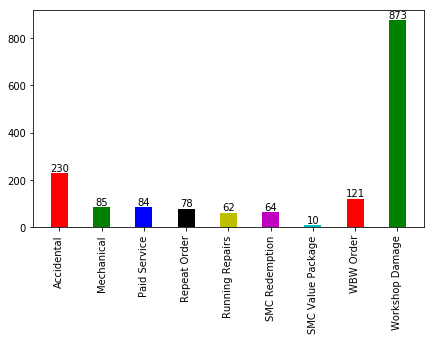

In [145]:
fig = plt.figure(figsize=(7, 4))
ax = plt.bar(HH.index, height=HH.values, width=0.4,color='rgbkymc')
for rect in ax:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()

In [161]:
Busy_Plant = pd.DataFrame(Final_Invoice_data.groupby('Plant')['Service Time(HH)'].median()).reset_index()
Plant_Service_count = pd.DataFrame(Final_Invoice_data['Plant'].value_counts()).reset_index()

In [165]:
Plant_Service_count.columns = ['Plant',"Plant's Service Count"]


In [166]:
Busy_Plant = pd.merge(Busy_Plant,Plant_Service_count,left_on='Plant',right_on='Plant',how='left')

In [174]:
Plant_Revenue = pd.DataFrame(round(Final_Invoice_data.groupby('Plant')['Total Amt Wtd Tax.'].sum()/100000,2)).reset_index()

In [177]:
Plant_Revenue.columns = ['Plant','Revenue(In Lacs)']
Busy_Plant = pd.merge(Busy_Plant,Plant_Revenue,left_on='Plant',right_on='Plant',how='left')

In [178]:
Busy_Plant.head()

,Plant,Service Time(HH),Plant's Service Count,Revenue(In Lacs)
0,BC01,22.0,14483,616.08
1,BC02,26.0,8209,312.38
2,BC03,9.0,28615,1087.68
3,BC04,23.0,4681,271.15
4,BC05,26.0,13323,753.88


In [180]:
Final_Invoice_data['In Time'].max() - Final_Invoice_data['In Time'].min()

Timedelta('1674 days 05:44:06')

In [181]:
(Final_Invoice_data['In Time'].max() - Final_Invoice_data['In Time'].min())/np.timedelta64(1,'D')

1674.2389583333334

In [198]:
Max_Time = pd.DataFrame(Final_Invoice_data.groupby('Plant')['Out Time'].max()).reset_index()
Min_Time = pd.DataFrame(Final_Invoice_data.groupby('Plant')['Out Time'].min()).reset_index()
Max_Time.columns = ['Plant','Max Time']
Min_Time.columns = ['Plant','Min Time']
Max_Time = pd.merge(Max_Time,Min_Time,left_on='Plant',right_on='Plant',how='left')

In [199]:
Max_Time['Duration of Plant(In Days)']  = round((Max_Time['Max Time'] - Max_Time['Min Time'])/np.timedelta64(1,'D'),0)

In [200]:
Max_Time.head()

,Plant,Max Time,Min Time,Duration of Plant(In Days)
0,BC01,2016-05-21 19:34:23,2012-04-02 17:26:52,1510.0
1,BC02,2015-03-20 20:24:14,2012-04-04 17:33:26,1080.0
2,BC03,2016-09-15 14:25:15,2012-04-02 17:04:33,1627.0
3,BC04,2014-08-11 14:58:53,2012-04-02 17:44:03,861.0
4,BC05,2016-09-15 15:00:00,2012-07-14 12:26:19,1524.0


In [201]:
Plant_Duration = Max_Time[['Plant','Duration of Plant(In Days)']]

In [203]:
Busy_Plant = pd.merge(Busy_Plant,Plant_Duration,left_on='Plant',right_on='Plant',how='left')

In [204]:
Busy_Plant.head()

,Plant,Service Time(HH),Plant's Service Count,Revenue(In Lacs),Duration of Plant(In Days)
0,BC01,22.0,14483,616.08,1510.0
1,BC02,26.0,8209,312.38,1080.0
2,BC03,9.0,28615,1087.68,1627.0
3,BC04,23.0,4681,271.15,861.0
4,BC05,26.0,13323,753.88,1524.0
